### Mouse data ( 1st step of data cleaning: reshape column)

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

In [2]:
current_dir=os.getcwd()

In [3]:
import import_ipynb
from Data import MOUSE

importing Jupyter notebook from Data.ipynb


In [4]:
mouse=MOUSE(f'{current_dir}/UCSC_data_Mouse/mouse_genes_020324_NCBI.csv')

In [5]:
mouse.col_preprocess()

In [6]:
mouse.drop()

In [7]:
mouse.df.rename(columns={'name2':'gene_name'},inplace=True)
### Replace the column name

In [8]:
# Function to calculate mRNA length
def calculate_mrna_length(row):
    starts = list(map(int, row['exonStarts'].split(',')[:-1]))
    ends = list(map(int, row['exonEnds'].split(',')[:-1]))
    lengths = [end - start for start, end in zip(starts, ends)]
    return sum(lengths)

# Apply the function to each row and create a new column for mRNA length
mouse.df['mature_mRNA_Length'] = mouse.df.apply(calculate_mrna_length, axis=1)

In [9]:
mouse_gene_df=mouse.select(['chrom','exonStarts','exonCount',
                        'gene_name','name'])

In [10]:
mouse_gene_df['exonStarts']=mouse_gene_df['exonStarts'].str.replace(r',\Z','',regex=True)
### remove the comma by the end of the column prior to splitting the data

In [11]:
mouse_gene_df['exonStarts']=mouse_gene_df['exonStarts'].str.split(",")

In [12]:
mouse_gene_df=mouse_gene_df.explode('exonStarts')

In [13]:
mouse_gene_df=mouse_gene_df.reset_index(drop=True)

In [14]:
mouse_gene_df_2=mouse.select(['exonEnds','cdsStart','cdsEnd','strand','exonCount','txStart','txEnd','mature_mRNA_Length','gene_name','name'])

In [15]:
mouse_gene_df_2['exonEnds']=mouse_gene_df_2['exonEnds'].str.replace(r',\Z','',regex=True)
### remove the comma at the end of column

In [16]:
mouse_gene_df_2['exonEnds']=mouse_gene_df_2['exonEnds'].str.split(",")

In [17]:
mouse_gene_df_2=mouse_gene_df_2.explode('exonEnds')

In [18]:
mouse_gene_df_2.head(50).reset_index(drop=True)

,exonEnds,cdsStart,cdsEnd,strand,exonCount,txStart,txEnd,mature_mRNA_Length,gene_name,name
0,134203590,134202950,134234733,-,2,134199214,134234856,4570,Adora1,NM_001291928.1
1,134234856,134202950,134234733,-,2,134199214,134234856,4570,Adora1,NM_001291928.1
2,134203590,134202950,134234355,-,2,134199214,134235457,5819,Adora1,NM_001008533.3
3,134235457,134202950,134234355,-,2,134199214,134235457,5819,Adora1,NM_001008533.3
4,134203590,134202950,134234355,-,3,134199214,134235457,5038,Adora1,NM_001282945.1
5,134234446,134202950,134234355,-,3,134199214,134235457,5038,Adora1,NM_001282945.1
6,134235457,134202950,134234355,-,3,134199214,134235457,5038,Adora1,NM_001282945.1
7,134203590,134202950,134234355,-,3,134199214,134235457,5004,Adora1,NM_001039510.2
8,134234412,134202950,134234355,-,3,134199214,134235457,5004,Adora1,NM_001039510.2
9,134235457,134202950,134234355,-,3,134199214,134235457,5004,Adora1,NM_001039510.2


In [19]:
mouse_gene_df_2.rename(columns={'gene_name':'Name','exonCount':'exon_count','name':'ID'},inplace=True)

In [20]:
mouse_gene_df_2 = mouse_gene_df_2.reset_index(drop=True)

### Concatanate the dataframe (Reshape the dataframe) and remove all miRNA dataset

In [21]:
finalized_mouse_gene_df=pd.concat([mouse_gene_df,mouse_gene_df_2], axis=1)#### This file contains all mouse genes!

In [22]:
finalized_mouse_gene_df.shape

(1385818, 15)

In [23]:
finalized_mouse_gene_df.columns

Index(['chrom', 'exonStarts', 'exonCount', 'gene_name', 'name', 'exonEnds',
       'cdsStart', 'cdsEnd', 'strand', 'exon_count', 'txStart', 'txEnd',
       'mature_mRNA_Length', 'Name', 'ID'],
      dtype='object')

In [24]:
finalized_mouse_gene_df.drop(columns=['exonCount','gene_name','name'],inplace=True)

In [25]:
finalized_mouse_gene_df.columns

Index(['chrom', 'exonStarts', 'exonEnds', 'cdsStart', 'cdsEnd', 'strand',
       'exon_count', 'txStart', 'txEnd', 'mature_mRNA_Length', 'Name', 'ID'],
      dtype='object')

In [26]:
####This regex only extract microRNA but not lncRNA.
mouse_p=r'^Mir\d+(-\d+)*$|^Mir\d+[a-z](-\d+)*$|^Mir\d+[a-z]([a-z]|\d)*$(?<!hg)$|^Mirlet\d[a-z]-*\d*$(?<!hg)$'

In [27]:
mouse_all_genes_no_miR_df=finalized_mouse_gene_df.loc[~finalized_mouse_gene_df['Name'].str.contains(
mouse_p, flags=re.I,regex=True)]####Remove all miR from the data. So this file has all mouse genes except for miRNAs

/var/folders/hz/4x5ldhv54fscy_nw6y5dbf2m0000gn/T/ipykernel_14017/1856401095.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mouse_all_genes_no_miR_df=finalized_mouse_gene_df.loc[~finalized_mouse_gene_df['Name'].str.contains(


In [28]:
mouse_all_genes_no_miR_df.shape

(1384536, 12)

In [29]:
mouse_all_genes_no_miR_df.columns

Index(['chrom', 'exonStarts', 'exonEnds', 'cdsStart', 'cdsEnd', 'strand',
       'exon_count', 'txStart', 'txEnd', 'mature_mRNA_Length', 'Name', 'ID'],
      dtype='object')

In [30]:
### save the file
mouse_all_genes_no_miR_df.to_csv(f'{current_dir}/Mouse_bash_script/mouse_all_genes_no_miR_df_NCBI.tsv',sep='\t',index=False)

### Extract miRNA data

In [31]:
##extract mouse miRs
mouse_df_miR=finalized_mouse_gene_df.loc[finalized_mouse_gene_df['Name'].str.contains(mouse_p,flags=re.I,regex=True)]

/var/folders/hz/4x5ldhv54fscy_nw6y5dbf2m0000gn/T/ipykernel_14017/3488575663.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mouse_df_miR=finalized_mouse_gene_df.loc[finalized_mouse_gene_df['Name'].str.contains(mouse_p,flags=re.I,regex=True)]


In [32]:
mouse_df_miR.shape ### this dataset do not have lncRNA (e.g. miR-210HG) It has only miRNAs

(1282, 12)

In [33]:
mouse_df_miR.head(5)

,chrom,exonStarts,exonEnds,cdsStart,cdsEnd,strand,exon_count,txStart,txEnd,mature_mRNA_Length,Name,ID
56853,chr1,12425985,12426106,12426106,12426106,+,1,12425985,12426106,121,Mir6341,NR_105759.1
57475,chr1,20679009,20679082,20679082,20679082,+,1,20679009,20679082,73,Mir206,NR_029593.1
57476,chr1,20682768,20682887,20682887,20682887,+,1,20682768,20682887,119,Mir133b,NR_029902.1
57636,chr1,23272268,23272339,23272339,23272339,+,1,23272268,23272339,71,Mir30a,NR_029533.1
57637,chr1,23291700,23291784,23291784,23291784,+,1,23291700,23291784,84,Mir30c-2,NR_029717.1


In [34]:
###save the file for microRNA dataset
mouse_df_miR.to_csv(f'{current_dir}/Mouse_bash_script/df_mousemiR_NCBI.tsv',sep="\t",index=False)

## 6. Before you run bedtools_intronic_miRs.sh, reshape the dataframe first and map intronic miRNA with the following steps

The reason for reshaping the dataframe are the following:
* We need to use txStart, txEnd coordinates instead of exon coordinates to find intronic miRNAs. 
* The finalized tsv files will be "mouse_all_genes_no_miR_df_TX_loc_NCBI.tsv".
* We will use this new tsv file to overlap the coordinates of miR to map all the intronic miRNAs.
* Remember the new file has txStart and txEnd locations instead of exon locations.
* bedtools_intronic_miRs.sh will also map the rest of miRNAs that don't have mRNA host genes.

### Mouse

In [35]:
columns=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd'
         , 'hostgene_strand','hostgene_exonCounts','hostgene_txStarts','hostgene_txEnds','mature_host_mRNA_Length',
       'hostgene_Name', 'hostgene_NCBI_ID','miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type'
         , 'miR_Name',
       'miR_strand', 'miR_ID']

In [36]:
mouse_exonicmiR_df=pd.read_csv(f'{current_dir}/Mouse_tsv_file/mouse_exonic_miR_NCBI.tsv', sep='\t', header=None, names=columns)

In [37]:
mouse_exonicmiR_df.head()

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_exonCounts,hostgene_txStarts,hostgene_txEnds,mature_host_mRNA_Length,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID
0,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,5195,A330023F24Rik,NR_015566.2,chr1,195037040,195037120,miRNA_primary_transcript,Name=mmu-mir-29b-2,+,Alias=MI0000712
1,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,5195,A330023F24Rik,NR_015566.2,chr1,195037050,195037074,miRNA,Name=mmu-miR-29b-2-5p,+,Alias=MIMAT0017063
2,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,5195,A330023F24Rik,NR_015566.2,chr1,195037091,195037113,miRNA,Name=mmu-miR-29b-3p,+,Alias=MIMAT0000127
3,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,5195,A330023F24Rik,NR_015566.2,chr1,195037547,195037634,miRNA_primary_transcript,Name=mmu-mir-29c,+,Alias=MI0000577
4,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,5195,A330023F24Rik,NR_015566.2,chr1,195037562,195037583,miRNA,Name=mmu-miR-29c-5p,+,Alias=MIMAT0004632


In [38]:
mouse_exonicmiR_df=mouse_exonicmiR_df.loc[mouse_exonicmiR_df['miR_type']=="miRNA_primary_transcript"]

In [39]:
mouse_exonicmiR_df.drop(columns=['miR_ID'],inplace=True)

In [40]:
mouse_exonicmiR_df.head()

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_exonCounts,hostgene_txStarts,hostgene_txEnds,mature_host_mRNA_Length,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand
0,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,5195,A330023F24Rik,NR_015566.2,chr1,195037040,195037120,miRNA_primary_transcript,Name=mmu-mir-29b-2,+
3,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,5195,A330023F24Rik,NR_015566.2,chr1,195037547,195037634,miRNA_primary_transcript,Name=mmu-mir-29c,+
6,chr1,20682712,20682958,20682958,20682958,+,3,20669881,20682958,521,Lincmd1,NR_131249.1,chr1,20682769,20682887,miRNA_primary_transcript,Name=mmu-mir-133b,+
9,chr1,86351980,86352127,86352127,86352127,-,1,86351980,86352127,147,Gm24148,NR_106184.1,chr1,86351981,86352127,miRNA_primary_transcript,Name=mmu-mir-3535,-
11,chr1,134946233,134946299,134946299,134946299,-,1,134946233,134946299,66,Gm51265,NR_162775.1,chr1,134946234,134946299,miRNA_primary_transcript,Name=mmu-mir-5104b,-


In [41]:
#Change string values in the columns of exonic miR files

# Reset the index
mouse_exonicmiR_df = mouse_exonicmiR_df.reset_index(drop=True)

# Create a new DataFrame with the updated "miR_name" column
new_df_2 = pd.DataFrame({"miR_name": mouse_exonicmiR_df["miR_Name"].str.replace("Name=", "")})

# Concatenate the new DataFrame with the remaining columns from the original DataFrame
mouse_exonicmiR_df.insert(12,"miR_name", new_df_2['miR_name'])
mouse_exonicmiR_df.drop(columns=["miR_Name"],inplace=True)

In [42]:
mouse_exonicmiR_df.head()

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_exonCounts,hostgene_txStarts,hostgene_txEnds,mature_host_mRNA_Length,hostgene_Name,hostgene_NCBI_ID,miR_name,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_strand
0,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,5195,A330023F24Rik,NR_015566.2,mmu-mir-29b-2,chr1,195037040,195037120,miRNA_primary_transcript,+
1,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,5195,A330023F24Rik,NR_015566.2,mmu-mir-29c,chr1,195037547,195037634,miRNA_primary_transcript,+
2,chr1,20682712,20682958,20682958,20682958,+,3,20669881,20682958,521,Lincmd1,NR_131249.1,mmu-mir-133b,chr1,20682769,20682887,miRNA_primary_transcript,+
3,chr1,86351980,86352127,86352127,86352127,-,1,86351980,86352127,147,Gm24148,NR_106184.1,mmu-mir-3535,chr1,86351981,86352127,miRNA_primary_transcript,-
4,chr1,134946233,134946299,134946299,134946299,-,1,134946233,134946299,66,Gm51265,NR_162775.1,mmu-mir-5104b,chr1,134946234,134946299,miRNA_primary_transcript,-


In [43]:
mouse_exonicmiR_df.shape

(339, 18)

In [44]:
csv_file_path=f'{current_dir}/Mouse_csv_file'

In [45]:
#save the mouse exonic data (tsv) file as a csv file
mouse_exonicmiR_df.to_csv(f'{csv_file_path}/mouse_exonic_miR_NCBI.csv',index=False)
#convert to csv file

## 6. Before you run bedtools_intronic_miRs.sh, reshape the dataframe first and map intronic miRNA with the following steps

The reason for reshaping the dataframe are the following:
* We need to use txStart, txEnd coordinates instead of exon coordinates to find intronic miRNAs. 
* The finalized tsv files will be "mouse_all_genes_no_miR_df_TX_loc_NCBI.tsv".
* We will use this new tsv file to overlap the coordinates of miR to map all the intronic miRNAs.
* Remember the new file has txStart and txEnd locations instead of exon locations.
* bedtools_intronic_miRs.sh will also map the rest of miRNAs that don't have mRNA host genes.

### Mouse

In [46]:
mouse_gene_df_tx=mouse.select(['chrom','txStart','txEnd','cdsStart','cdsEnd','strand',
                        'gene_name','name'])
#### here you will select transcription start and end sites

In [47]:
mouse_gene_df_tx.rename(columns={'gene_name':'Name','name':'ID'},inplace=True)

In [48]:
mouse_all_genes_no_miR_df_TX_loc=mouse_gene_df_tx.loc[~mouse_gene_df_tx['Name'].str.contains(
mouse_p, flags=re.I,regex=True)]####Remove all miR from the data.

/var/folders/hz/4x5ldhv54fscy_nw6y5dbf2m0000gn/T/ipykernel_14017/3585549947.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mouse_all_genes_no_miR_df_TX_loc=mouse_gene_df_tx.loc[~mouse_gene_df_tx['Name'].str.contains(


In [49]:
mouse_all_genes_no_miR_df_TX_loc.to_csv(f'{current_dir}/Mouse_tsv_file/mouse_all_genes_no_miR_df_TX_loc_NCBI.tsv',sep='\t',index=False)

In [50]:
##### use this file to find intronic miRNAs, by running bedtools_mouse_intronic_miR.sh

In [51]:
#### Run bedtools_human_nonexonic_miR.sh and then bedtools_mouse_intronic_miR.sh

### 7. Use Gene_func file to add additional columns to the dataframe (7th step).
This new column will have a new column called gene type. Bascially this new dataframe will tell you if the host gene is a protein or non-coding RNA.

In [52]:
from Gene_func import Gene_type
from Gene_func import Cal_mRNA_length

importing Jupyter notebook from Gene_func.ipynb


In [53]:
Gene_type(mouse_exonicmiR_df,'hostgene_cdsStart','hostgene_cdsEnd','gene_type')

<string>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'non-coding gene' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.


In [54]:
mouse_exonicmiR_df.head()

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_exonCounts,hostgene_txStarts,hostgene_txEnds,mature_host_mRNA_Length,hostgene_Name,hostgene_NCBI_ID,miR_name,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_strand,gene_type
0,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,5195,A330023F24Rik,NR_015566.2,mmu-mir-29b-2,chr1,195037040,195037120,miRNA_primary_transcript,+,non-coding gene
1,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,5195,A330023F24Rik,NR_015566.2,mmu-mir-29c,chr1,195037547,195037634,miRNA_primary_transcript,+,non-coding gene
2,chr1,20682712,20682958,20682958,20682958,+,3,20669881,20682958,521,Lincmd1,NR_131249.1,mmu-mir-133b,chr1,20682769,20682887,miRNA_primary_transcript,+,non-coding gene
3,chr1,86351980,86352127,86352127,86352127,-,1,86351980,86352127,147,Gm24148,NR_106184.1,mmu-mir-3535,chr1,86351981,86352127,miRNA_primary_transcript,-,non-coding gene
4,chr1,134946233,134946299,134946299,134946299,-,1,134946233,134946299,66,Gm51265,NR_162775.1,mmu-mir-5104b,chr1,134946234,134946299,miRNA_primary_transcript,-,non-coding gene


In [55]:
Cal_mRNA_length(mouse_exonicmiR_df,'hostgene_txStarts','hostgene_txEnds','hostgene_cdsStart','hostgene_cdsEnd','gene_type','pre_mRNA_length')

In [56]:
mouse_exonicmiR_df.head()

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_exonCounts,hostgene_txStarts,hostgene_txEnds,mature_host_mRNA_Length,hostgene_Name,hostgene_NCBI_ID,miR_name,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_strand,gene_type,pre_mRNA_length
0,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,5195,A330023F24Rik,NR_015566.2,mmu-mir-29b-2,chr1,195037040,195037120,miRNA_primary_transcript,+,non-coding gene,20510.0
1,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,5195,A330023F24Rik,NR_015566.2,mmu-mir-29c,chr1,195037547,195037634,miRNA_primary_transcript,+,non-coding gene,20510.0
2,chr1,20682712,20682958,20682958,20682958,+,3,20669881,20682958,521,Lincmd1,NR_131249.1,mmu-mir-133b,chr1,20682769,20682887,miRNA_primary_transcript,+,non-coding gene,13077.0
3,chr1,86351980,86352127,86352127,86352127,-,1,86351980,86352127,147,Gm24148,NR_106184.1,mmu-mir-3535,chr1,86351981,86352127,miRNA_primary_transcript,-,non-coding gene,147.0
4,chr1,134946233,134946299,134946299,134946299,-,1,134946233,134946299,66,Gm51265,NR_162775.1,mmu-mir-5104b,chr1,134946234,134946299,miRNA_primary_transcript,-,non-coding gene,66.0


In [57]:
### save it as a csv file
mouse_exonicmiR_df.to_csv(f'{current_dir}/Mouse_csv_file/mouse_exonic_miR(gene_type)_NCBI.csv',index=False)

## Intronic miRNAs organization

#### Mouse

In [58]:
#bedtools will generate the overlapped intronic miR files


columns_2=['hostgene_chrom', 'hostgene_TxStarts', 'hostgene_TxEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd'
         , 'hostgene_strand',
       'hostgene_Name', 'hostgene_NCBI_ID','miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type'
         , 'miR_Name',
       'miR_strand', 'miR_ID']

In [59]:
mouse_intronicmiR_df=pd.read_csv(f'{current_dir}/Mouse_tsv_file/mouse_intronic_miR_NCBI.tsv', sep='\t', header=None, names=columns_2)

In [60]:
mouse_intronicmiR_df.head()

,hostgene_chrom,hostgene_TxStarts,hostgene_TxEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID
0,chr1,160219173,160792925,160224215,160740889,-,Rabgap1l,XM_006496877.3,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914
1,chr1,160219173,160792925,160224215,160740889,-,Rabgap1l,XM_006496877.3,chr1,160295885,160295907,miRNA,Name=mmu-miR-1927,-,Alias=MIMAT0009390
2,chr1,160219173,160792972,160224215,160740889,-,Rabgap1l,XM_006496876.2,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914
3,chr1,160219173,160792972,160224215,160740889,-,Rabgap1l,XM_006496876.2,chr1,160295885,160295907,miRNA,Name=mmu-miR-1927,-,Alias=MIMAT0009390
4,chr1,160219173,160792987,160224215,160739052,-,Rabgap1l,XM_006496878.4,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914


In [61]:
mouse_intronicmiR_df=mouse_intronicmiR_df.loc[mouse_intronicmiR_df['miR_type']=="miRNA_primary_transcript"]

In [62]:
mouse_intronicmiR_df.drop(columns=['miR_ID'],inplace=True)

In [63]:
mouse_intronicmiR_df.head()

,hostgene_chrom,hostgene_TxStarts,hostgene_TxEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand
0,chr1,160219173,160792925,160224215,160740889,-,Rabgap1l,XM_006496877.3,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-
2,chr1,160219173,160792972,160224215,160740889,-,Rabgap1l,XM_006496876.2,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-
4,chr1,160219173,160792987,160224215,160739052,-,Rabgap1l,XM_006496878.4,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-
6,chr1,160219173,160793476,160224215,160740889,-,Rabgap1l,XM_006496875.1,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-
8,chr1,160256571,160792938,160257251,160740889,-,Rabgap1l,NM_013862.5,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-


In [64]:
mouse_intronicmiR_df.columns

Index(['hostgene_chrom', 'hostgene_TxStarts', 'hostgene_TxEnds',
       'hostgene_cdsStart', 'hostgene_cdsEnd', 'hostgene_strand',
       'hostgene_Name', 'hostgene_NCBI_ID', 'miR_chrom', 'miR_exonStarts',
       'miR_exonEnds', 'miR_type', 'miR_Name', 'miR_strand'],
      dtype='object')

In [65]:
#Change string values in the columns of exonic miR files

# Reset the index
mouse_intronicmiR_df= mouse_intronicmiR_df.reset_index(drop=True)

# Create a new DataFrame with the updated "miR_name" column
mm_intron_df= pd.DataFrame({"miR_name": mouse_intronicmiR_df["miR_Name"].str.replace("Name=", "")})

# Concatenate the new DataFrame with the remaining columns from the original DataFrame
mouse_intronicmiR_df.insert(12,"miR_name",mm_intron_df['miR_name'])
mouse_intronicmiR_df.drop(columns=["miR_Name"],inplace=True)

In [66]:
mouse_intronicmiR_df.shape

(4019, 14)

In [67]:
#save it as a csv file
mouse_intronicmiR_df.to_csv(f'{csv_file_path}/mouse_intronic_miR_NCBI.csv',index=False)#convert to csv file

In [68]:
Gene_type(mouse_intronicmiR_df,'hostgene_cdsStart','hostgene_cdsEnd','gene_type')

<string>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'non-coding gene' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.


In [69]:
mouse_intronicmiR_df.head()

,hostgene_chrom,hostgene_TxStarts,hostgene_TxEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_name,miR_strand,gene_type
0,chr1,160219173,160792925,160224215,160740889,-,Rabgap1l,XM_006496877.3,chr1,160295864,160295972,miRNA_primary_transcript,mmu-mir-1927,-,protein-coding gene
1,chr1,160219173,160792972,160224215,160740889,-,Rabgap1l,XM_006496876.2,chr1,160295864,160295972,miRNA_primary_transcript,mmu-mir-1927,-,protein-coding gene
2,chr1,160219173,160792987,160224215,160739052,-,Rabgap1l,XM_006496878.4,chr1,160295864,160295972,miRNA_primary_transcript,mmu-mir-1927,-,protein-coding gene
3,chr1,160219173,160793476,160224215,160740889,-,Rabgap1l,XM_006496875.1,chr1,160295864,160295972,miRNA_primary_transcript,mmu-mir-1927,-,protein-coding gene
4,chr1,160256571,160792938,160257251,160740889,-,Rabgap1l,NM_013862.5,chr1,160295864,160295972,miRNA_primary_transcript,mmu-mir-1927,-,protein-coding gene


In [70]:
Cal_mRNA_length(mouse_intronicmiR_df,'hostgene_TxStarts','hostgene_TxEnds','hostgene_cdsStart','hostgene_cdsEnd','gene_type','pre_mRNA_length')

In [71]:
mouse_intronicmiR_df.head()

,hostgene_chrom,hostgene_TxStarts,hostgene_TxEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_name,miR_strand,gene_type,pre_mRNA_length
0,chr1,160219173,160792925,160224215,160740889,-,Rabgap1l,XM_006496877.3,chr1,160295864,160295972,miRNA_primary_transcript,mmu-mir-1927,-,protein-coding gene,573752.0
1,chr1,160219173,160792972,160224215,160740889,-,Rabgap1l,XM_006496876.2,chr1,160295864,160295972,miRNA_primary_transcript,mmu-mir-1927,-,protein-coding gene,573799.0
2,chr1,160219173,160792987,160224215,160739052,-,Rabgap1l,XM_006496878.4,chr1,160295864,160295972,miRNA_primary_transcript,mmu-mir-1927,-,protein-coding gene,573814.0
3,chr1,160219173,160793476,160224215,160740889,-,Rabgap1l,XM_006496875.1,chr1,160295864,160295972,miRNA_primary_transcript,mmu-mir-1927,-,protein-coding gene,574303.0
4,chr1,160256571,160792938,160257251,160740889,-,Rabgap1l,NM_013862.5,chr1,160295864,160295972,miRNA_primary_transcript,mmu-mir-1927,-,protein-coding gene,536367.0


In [72]:
mouse_intronicmiR_df.to_csv(f'{current_dir}/Mouse_tsv_file/mouse_intronic_miR(gene_type)_NCBI.csv',index=False)

## Map percentages of intronic, exonic, other microRNAs using bedtools

* This step is also run after bedtools files are run (bedtools_mouse_nonexonic_miR.sh)

### Mouse intragenetic miRNAs(intronic/exonic miRs)

In [73]:
mRNA_miR_columns=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 
                  'hostgene_cdsStarts', 'hostgene_cdsEnds', 'hostgene_strand',
                 'exon_counts','hostgene_TxStarts','hostgene_TxEnds','mature_host_mRNA_Length','hostgene_Name', 'hostgene_NCBI_ID','miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 
              'miR_Name','miR_strand', 'miR_ID']

In [74]:
Mouse_exonic_miR_df=pd.read_csv(f'{current_dir}/Mouse_tsv_file/mouse_exonic_miR_NCBI.tsv', sep='\t', header=None, names=mRNA_miR_columns)

In [75]:
Mouse_exonic_miR_df

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStarts,hostgene_cdsEnds,hostgene_strand,exon_counts,hostgene_TxStarts,hostgene_TxEnds,mature_host_mRNA_Length,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID
0,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,5195,A330023F24Rik,NR_015566.2,chr1,195037040,195037120,miRNA_primary_transcript,Name=mmu-mir-29b-2,+,Alias=MI0000712
1,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,5195,A330023F24Rik,NR_015566.2,chr1,195037050,195037074,miRNA,Name=mmu-miR-29b-2-5p,+,Alias=MIMAT0017063
2,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,5195,A330023F24Rik,NR_015566.2,chr1,195037091,195037113,miRNA,Name=mmu-miR-29b-3p,+,Alias=MIMAT0000127
3,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,5195,A330023F24Rik,NR_015566.2,chr1,195037547,195037634,miRNA_primary_transcript,Name=mmu-mir-29c,+,Alias=MI0000577
4,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,5195,A330023F24Rik,NR_015566.2,chr1,195037562,195037583,miRNA,Name=mmu-miR-29c-5p,+,Alias=MIMAT0004632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,chr19,40894563,40894786,40911628,40916065,+,5,40894563,40917942,6972,Zfp518a,XM_030251088.1,chr19,40894754,40894774,miRNA,Name=mmu-miR-8092,+,Alias=MIMAT0031393
969,chr19,40894563,40894790,40911628,40916065,+,4,40894563,40917942,6831,Zfp518a,XM_011247364.2,chr19,40894703,40894789,miRNA_primary_transcript,Name=mmu-mir-8092,+,Alias=MI0026019
970,chr19,40894563,40894790,40911628,40916065,+,4,40894563,40917942,6831,Zfp518a,XM_011247364.2,chr19,40894754,40894774,miRNA,Name=mmu-miR-8092,+,Alias=MIMAT0031393
971,chr19,40894704,40894790,40911628,40916065,+,5,40894704,40917947,6840,Zfp518a,NM_028319.1,chr19,40894754,40894774,miRNA,Name=mmu-miR-8092,+,Alias=MIMAT0031393


In [76]:
Mouse_exonic_miR_df=Mouse_exonic_miR_df.drop(columns=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 'hostgene_cdsStarts', 'hostgene_cdsEnds'
, 'hostgene_strand','exon_counts','hostgene_TxStarts','hostgene_TxEnds','mature_host_mRNA_Length','hostgene_Name', 'hostgene_NCBI_ID'])

In [77]:
Mouse_exonic_miR_df['miRNA_type']='exonic miR'

In [78]:
Mouse_exonic_miR_df=Mouse_exonic_miR_df.loc[Mouse_exonic_miR_df['miR_type']=="miRNA_primary_transcript"]

In [79]:
Mouse_exonic_miR_df=Mouse_exonic_miR_df.drop_duplicates(subset=['miR_Name'])### get the unique list of miRNAs

In [80]:
Mouse_exonic_miR_df.shape

(170, 8)

In [81]:
excel_file_path=f'{current_dir}/Mouse_excel_file'

In [82]:
csv_file_path=f'{current_dir}/Mouse_csv_file'

In [83]:
Mouse_exonic_miR_df.to_csv(f'{csv_file_path}/Mouse_exonic_miR_df_unique.csv',index=False)
Mouse_exonic_miR_df.to_excel(f'{current_dir}/Mouse_excel_file/Mouse_exonic_miR_df_unique.xlsx',index=False)### save it as a exonic miRNA excel file for later use
### this step is to use for mapping intronic and intergenetic miRNAs

## Mouse intronic microRNA files
(Run this after running bedtools_mouse_intronic_miR.sh)

In [84]:
mRNA_miR_columns_2=['hostgene_chrom', 'hostgene_TxStarts', 'hostgene_TxEnds', 
                  'hostgene_cdsStarts', 'hostgene_cdsEnds', 'hostgene_strand',
                 'hostgene_Name', 'hostgene_NCBI_ID','miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 
              'miR_Name','miR_strand', 'miR_ID']

In [85]:
###all intronic micrornas
Mouse_intronic_miR_df=pd.read_csv(f'{current_dir}/Mouse_tsv_file/mouse_intronic_miR_NCBI.tsv', sep='\t', header=None, names=mRNA_miR_columns_2)

In [86]:
Mouse_intronic_miR_df

,hostgene_chrom,hostgene_TxStarts,hostgene_TxEnds,hostgene_cdsStarts,hostgene_cdsEnds,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID
0,chr1,160219173,160792925,160224215,160740889,-,Rabgap1l,XM_006496877.3,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914
1,chr1,160219173,160792925,160224215,160740889,-,Rabgap1l,XM_006496877.3,chr1,160295885,160295907,miRNA,Name=mmu-miR-1927,-,Alias=MIMAT0009390
2,chr1,160219173,160792972,160224215,160740889,-,Rabgap1l,XM_006496876.2,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914
3,chr1,160219173,160792972,160224215,160740889,-,Rabgap1l,XM_006496876.2,chr1,160295885,160295907,miRNA,Name=mmu-miR-1927,-,Alias=MIMAT0009390
4,chr1,160219173,160792987,160224215,160739052,-,Rabgap1l,XM_006496878.4,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11868,chr19,52991180,53015341,52991590,53013471,-,Xpnpep1,XM_017318075.2,chr19,53010679,53010701,miRNA,Name=mmu-miR-6407,-,Alias=MIMAT0025160
11869,chr19,52991180,53032644,52991590,53025375,-,Xpnpep1,XM_011247159.2,chr19,53010656,53010756,miRNA_primary_transcript,Name=mmu-mir-6407,-,Alias=MI0021944
11870,chr19,52991180,53032644,52991590,53025375,-,Xpnpep1,XM_011247159.2,chr19,53010679,53010701,miRNA,Name=mmu-miR-6407,-,Alias=MIMAT0025160
11871,chr19,52991182,53038570,52991590,53025375,-,Xpnpep1,NM_001374834.1,chr19,53010656,53010756,miRNA_primary_transcript,Name=mmu-mir-6407,-,Alias=MI0021944


In [87]:
Mouse_intronic_miR_df=Mouse_intronic_miR_df.drop(columns=['hostgene_chrom', 'hostgene_TxStarts', 'hostgene_TxEnds', 'hostgene_cdsStarts', 'hostgene_cdsEnds'
, 'hostgene_strand','hostgene_Name', 'hostgene_NCBI_ID'])

In [88]:
Mouse_intronic_miR_df['miRNA_type']='intronic miR'

In [89]:
Mouse_intronic_miR_df=Mouse_intronic_miR_df.loc[Mouse_intronic_miR_df['miR_type']=="miRNA_primary_transcript"]

In [90]:
Mouse_intronic_miR_df.head()

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,miRNA_type
0,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914,intronic miR
2,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914,intronic miR
4,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914,intronic miR
6,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914,intronic miR
8,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914,intronic miR


In [91]:
Mouse_intronic_miR_df.drop_duplicates(subset=['miR_Name'],inplace=True)### get the unique list of miRNAs

In [92]:
Mouse_intronic_miR_df.shape

(599, 8)

In [93]:
Mouse_intronic_miR_df.to_csv(f'{current_dir}/Mouse_csv_file/Mouse_intronic_miR_df_unique.csv', index=False)
Mouse_intronic_miR_df.to_excel(f'{current_dir}/Mouse_excel_file/Mouse_intronic_miR_df_unique.xlsx', index=False)

### Mouse intergenetic microRNA files

In [94]:
columns_4=['miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_Name','miR_strand', 'miR_ID']

In [95]:
###all NO host mRNA micrornas
Mouse_no_host_mRNA_miR_df=pd.read_csv(f'{current_dir}/Mouse_tsv_file/mouse_miR_no_hostmRNA_NCBI.tsv', sep='\t', header=None, names=columns_4)

In [96]:
Mouse_no_host_mRNA_miR_df['miRNA_type']='no host mRNA miR'

In [97]:
Mouse_no_host_mRNA_miR_df=Mouse_no_host_mRNA_miR_df.loc[Mouse_no_host_mRNA_miR_df['miR_type']=="miRNA_primary_transcript"]

In [98]:
Mouse_no_host_mRNA_miR_df=Mouse_no_host_mRNA_miR_df.drop_duplicates(subset=['miR_Name'])### get the unique list of miRNAs

In [99]:
Mouse_no_host_mRNA_miR_df.shape

(258, 8)

In [100]:
Mouse_no_host_mRNA_miR_df.to_csv(f"{current_dir}/Mouse_csv_file/mouse_miR_no_hostmRNA_NCBI_unique.csv",index=False)
Mouse_no_host_mRNA_miR_df.to_excel(f"{current_dir}/Mouse_excel_file/mouse_miR_no_hostmRNA_NCBI_unique.xlsx",index=False)

#### Now generate a dataframe to classify all different types of miRNAs (e.g. exonic/intronic/no_host_genes).

### Mouse

In [101]:
columns_3=['miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_Name','miR_strand', 'miR_ID']
mouse_miR_miRBase_df=pd.read_csv(f'{current_dir}/Mouse_tsv_file/mmu_finalized.tsv', sep='\t', header=None, names=columns_3)###all micrornas
mouse_miR_miRBase_df.head()

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID
0,chr1,12425986,12426106,miRNA_primary_transcript,Name=mmu-mir-6341,+,Alias=MI0021869
1,chr1,12426016,12426038,miRNA,Name=mmu-miR-6341,+,Alias=MIMAT0025084
2,chr1,20679010,20679082,miRNA_primary_transcript,Name=mmu-mir-206,+,Alias=MI0000249
3,chr1,20679017,20679039,miRNA,Name=mmu-miR-206-5p,+,Alias=MIMAT0017004
4,chr1,20679055,20679076,miRNA,Name=mmu-miR-206-3p,+,Alias=MIMAT0000239


In [102]:
Mouse_miR_type_df=pd.concat([Mouse_exonic_miR_df, Mouse_intronic_miR_df, Mouse_no_host_mRNA_miR_df], axis=0)

In [103]:
Mouse_miR_type_df=Mouse_miR_type_df.drop(columns=['miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_ID','miR_strand'])

In [104]:
Mouse_miR_type_finalized_df=mouse_miR_miRBase_df.merge(Mouse_miR_type_df,on="miR_Name",how='left')

In [105]:
Mouse_miR_type_finalized_df=Mouse_miR_type_finalized_df.loc[Mouse_miR_type_finalized_df['miR_type']=="miRNA_primary_transcript"]

In [106]:
Mouse_miR_type_finalized_df.head(50)

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,miRNA_type
0,chr1,12425986,12426106,miRNA_primary_transcript,Name=mmu-mir-6341,+,Alias=MI0021869,NaN
2,chr1,20679010,20679082,miRNA_primary_transcript,Name=mmu-mir-206,+,Alias=MI0000249,intronic miR
5,chr1,20682769,20682887,miRNA_primary_transcript,Name=mmu-mir-133b,+,Alias=MI0000821,exonic miR
8,chr1,23272269,23272339,miRNA_primary_transcript,Name=mmu-mir-30a,+,Alias=MI0000144,no host mRNA miR
11,chr1,23291701,23291784,miRNA_primary_transcript,Name=mmu-mir-30c-2,+,Alias=MI0000548,no host mRNA miR
14,chr1,29421488,29421612,miRNA_primary_transcript,Name=mmu-mir-6342,+,Alias=MI0021870,no host mRNA miR
16,chr1,34117359,34117431,miRNA_primary_transcript,Name=mmu-mir-6896,+,Alias=MI0022743,intronic miR
19,chr1,34433121,34433199,miRNA_primary_transcript,Name=mmu-mir-5103,-,Alias=MI0018011,no host mRNA miR
21,chr1,36144252,36144313,miRNA_primary_transcript,Name=mmu-mir-6897,-,Alias=MI0022744,intronic miR
24,chr1,36348682,36348758,miRNA_primary_transcript,Name=mmu-mir-6898,-,Alias=MI0022745,intronic miR


In [107]:
Mouse_miR_type_finalized_df.shape

(1229, 8)

## Here you will:
### 1) fill in the other empty cells with partially overlapped with exons
### 2) finalize the dataframe.

In [108]:
Mouse_miR_type_finalized_df['miRNA_type']=Mouse_miR_type_finalized_df['miRNA_type'].fillna("partially overlapped with exons and the opposite strands")

In [109]:
Mouse_miR_type_finalized_df['miR_Name']=Mouse_miR_type_finalized_df['miR_Name'].str.replace("Name=","")

In [110]:
Mouse_miR_type_finalized_df

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,miRNA_type
0,chr1,12425986,12426106,miRNA_primary_transcript,mmu-mir-6341,+,Alias=MI0021869,partially overlapped with exons and the opposi...
2,chr1,20679010,20679082,miRNA_primary_transcript,mmu-mir-206,+,Alias=MI0000249,intronic miR
5,chr1,20682769,20682887,miRNA_primary_transcript,mmu-mir-133b,+,Alias=MI0000821,exonic miR
8,chr1,23272269,23272339,miRNA_primary_transcript,mmu-mir-30a,+,Alias=MI0000144,no host mRNA miR
11,chr1,23291701,23291784,miRNA_primary_transcript,mmu-mir-30c-2,+,Alias=MI0000548,no host mRNA miR
...,...,...,...,...,...,...,...,...
3325,chrX,150547385,150547445,miRNA_primary_transcript,mmu-mir-3620,-,Alias=MI0025027,partially overlapped with exons and the opposi...
3328,chrX,151859562,151859637,miRNA_primary_transcript,mmu-mir-3113,+,Alias=MI0014111,exonic miR
3331,chrX,151912346,151912428,miRNA_primary_transcript,mmu-let-7f-2,+,Alias=MI0000563,intronic miR
3334,chrX,151913214,151913321,miRNA_primary_transcript,mmu-mir-98,+,Alias=MI0000586,intronic miR


In [111]:
Mouse_miR_type_finalized_df_new=Mouse_miR_type_finalized_df.drop_duplicates(subset=['miR_Name'])

In [112]:
Mouse_miR_type_finalized_df.shape

(1229, 8)

In [113]:
Mouse_miR_type_finalized_df_new.shape

(1226, 8)

In [114]:
Mouse_miR_type_finalized_df_new.columns

Index(['miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_Name',
       'miR_strand', 'miR_ID', 'miRNA_type'],
      dtype='object')

## Plotting percentages of intergenetic and intragenetic miRNAs

### Mouse

In [115]:
Mouse_miR_type_finalized_df.columns

Index(['miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_Name',
       'miR_strand', 'miR_ID', 'miRNA_type'],
      dtype='object')

In [116]:
def Hostgene_type(df, miRNAtype,hostgenetype):
    df[hostgenetype]=df[miRNAtype].apply(lambda x:"intergenic" if x=="no host mRNA miR" else "intragenic")
    return df

In [117]:
Hostgene_type(Mouse_miR_type_finalized_df,'miRNA_type', "main_miRNA_type")

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,miRNA_type,main_miRNA_type
0,chr1,12425986,12426106,miRNA_primary_transcript,mmu-mir-6341,+,Alias=MI0021869,partially overlapped with exons and the opposi...,intragenic
2,chr1,20679010,20679082,miRNA_primary_transcript,mmu-mir-206,+,Alias=MI0000249,intronic miR,intragenic
5,chr1,20682769,20682887,miRNA_primary_transcript,mmu-mir-133b,+,Alias=MI0000821,exonic miR,intragenic
8,chr1,23272269,23272339,miRNA_primary_transcript,mmu-mir-30a,+,Alias=MI0000144,no host mRNA miR,intergenic
11,chr1,23291701,23291784,miRNA_primary_transcript,mmu-mir-30c-2,+,Alias=MI0000548,no host mRNA miR,intergenic
...,...,...,...,...,...,...,...,...,...
3325,chrX,150547385,150547445,miRNA_primary_transcript,mmu-mir-3620,-,Alias=MI0025027,partially overlapped with exons and the opposi...,intragenic
3328,chrX,151859562,151859637,miRNA_primary_transcript,mmu-mir-3113,+,Alias=MI0014111,exonic miR,intragenic
3331,chrX,151912346,151912428,miRNA_primary_transcript,mmu-let-7f-2,+,Alias=MI0000563,intronic miR,intragenic
3334,chrX,151913214,151913321,miRNA_primary_transcript,mmu-mir-98,+,Alias=MI0000586,intronic miR,intragenic


In [118]:
mm_loci=Mouse_miR_type_finalized_df_new.groupby(Mouse_miR_type_finalized_df['main_miRNA_type']).size().reset_index(name='Count')

In [119]:
mm_loci

,main_miRNA_type,Count
0,intergenic,258
1,intragenic,968


In [120]:
mm_intergenic= mm_loci[mm_loci['main_miRNA_type']=='intergenic'].sum()
mm_intragenic= mm_loci[mm_loci['main_miRNA_type']=='intragenic'].sum()

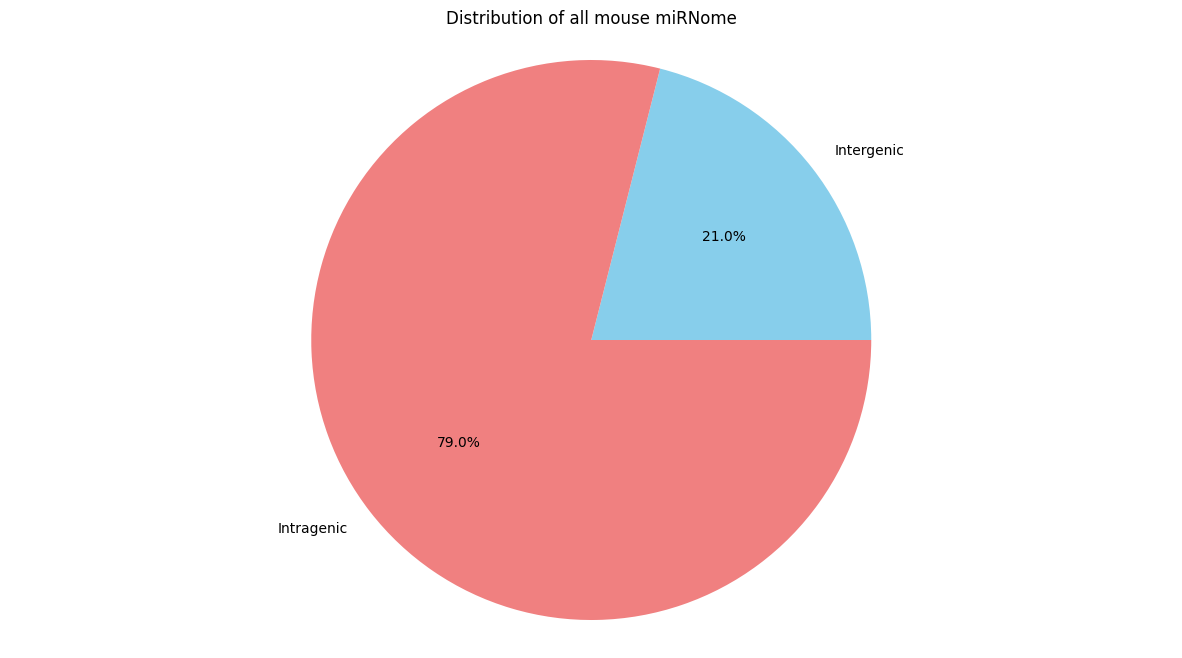

In [121]:
#Human miR loci distribution pie Chart
labels = ['Intergenic', 'Intragenic']
sizes = [mm_intergenic['Count'],mm_intragenic['Count']]
colors = ['skyblue','lightcoral']
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of all mouse miRNome')
plt.savefig(f'{current_dir}/Mouse_eps_file/Distribution of mouse miRNome(intergenic vs intragenic).eps')
plt.show()

### Intragenic Exonic sense vs antinsense

In [122]:
exonic_intragenic_columns=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd'
         , 'hostgene_strand','hostgene_exonCounts','hostgene_txStarts','hostgene_txEnds','mature_host_mRNA_Length',
       'hostgene_Name', 'hostgene_NCBI_ID','miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type'
         , 'miR_Name',
       'miR_strand', 'miR_ID']

In [123]:
Mouse_exonicmiR_intragenic=pd.read_csv(f"{current_dir}/Mouse_tsv_file/mouse_exonic_miR_intragenic_NCBI.tsv", sep="\t",
                                      header=None,names=exonic_intragenic_columns)

In [124]:
Mouse_exonicmiR_antisense=pd.read_csv(f"{current_dir}/Mouse_tsv_file/mouse_exonic_miR_opposite_NCBI.tsv", sep="\t",
                                      header=None,names=exonic_intragenic_columns)

In [125]:
Mouse_exonicmiR_intragenic=Mouse_exonicmiR_intragenic.loc[Mouse_exonicmiR_intragenic['miR_type']=="miRNA_primary_transcript"]

In [126]:
Mouse_exonicmiR_intragenic=Mouse_exonicmiR_intragenic.drop_duplicates(subset=["miR_Name"])

In [127]:
Mouse_exonicmiR_intragenic["miR_Name"]=Mouse_exonicmiR_intragenic["miR_Name"].str.replace("Name=", "")

In [128]:
Mouse_exonicmiR_intragenic["host_gene_region"]="exons"

In [129]:
Mouse_exonicmiR_intragenic

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_exonCounts,hostgene_txStarts,hostgene_txEnds,mature_host_mRNA_Length,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,host_gene_region
0,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,5195,A330023F24Rik,NR_015566.2,chr1,195037040,195037120,miRNA_primary_transcript,mmu-mir-29b-2,+,Alias=MI0000712,exons
3,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,5195,A330023F24Rik,NR_015566.2,chr1,195037547,195037634,miRNA_primary_transcript,mmu-mir-29c,+,Alias=MI0000577,exons
6,chr1,20682712,20682958,20682958,20682958,+,3,20669881,20682958,521,Lincmd1,NR_131249.1,chr1,20682769,20682887,miRNA_primary_transcript,mmu-mir-133b,+,Alias=MI0000821,exons
9,chr1,86351980,86352127,86352127,86352127,-,1,86351980,86352127,147,Gm24148,NR_106184.1,chr1,86351981,86352127,miRNA_primary_transcript,mmu-mir-3535,-,Alias=MI0026036,exons
11,chr1,93274604,93274718,93274104,93296278,+,31,93235795,93301065,9228,Sned1,XM_030252567.1,chr1,93274549,93274610,miRNA_primary_transcript,mmu-mir-6901,+,Alias=MI0022748,exons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,chr19,6914078,6914292,6911750,6914091,-,6,6910976,6921709,1903,Esrra,XM_017318209.2,chr19,6914196,6914286,miRNA_primary_transcript,mmu-mir-6990,-,Alias=MI0022838,exons
1317,chr19,7421913,7425908,7417778,7423106,+,4,7417757,7425908,5040,2700081O15Rik,XM_011247115.3,chr19,7422573,7422642,miRNA_primary_transcript,mmu-mir-6991,+,Alias=MI0022839,exons
1320,chr19,8888386,8888770,8888770,8888770,-,1,8888386,8888770,384,5730408K05Rik,NR_027866.1,chr19,8888699,8888774,miRNA_primary_transcript,mmu-mir-5136,-,Alias=MI0018048,exons
1322,chr19,40894563,40894786,40911628,40916065,+,5,40894563,40917942,6972,Zfp518a,XM_030251088.1,chr19,40894703,40894789,miRNA_primary_transcript,mmu-mir-8092,+,Alias=MI0026019,exons


In [130]:
Mouse_exonicmiR_intragenic.shape

(237, 20)

In [131]:
Mouse_exonicmiR_antisense=Mouse_exonicmiR_antisense.loc[Mouse_exonicmiR_antisense['miR_type']=="miRNA_primary_transcript"]

In [132]:
Mouse_exonicmiR_antisense=Mouse_exonicmiR_antisense.drop_duplicates(subset=["miR_Name"])

In [133]:
Mouse_exonicmiR_antisense["miR_Name"]=Mouse_exonicmiR_antisense["miR_Name"].str.replace("Name=", "")

In [134]:
Mouse_exonicmiR_antisense["host_gene_region"]="exons"

In [135]:
Mouse_exonicmiR_antisense.shape

(73, 20)

In [136]:
Mouse_exonicmiR_antisense

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_exonCounts,hostgene_txStarts,hostgene_txEnds,mature_host_mRNA_Length,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,host_gene_region
0,chr1,84695452,84696221,84370763,84695728,-,13,84369838,84696221,3632,Dner,NM_152915.1,chr1,84695839,84695915,miRNA_primary_transcript,mmu-mir-5126,+,Alias=MI0018038,exons
2,chr1,118952775,118961165,118961165,118961165,-,2,118945048,118961165,15024,Gm51642,XR_003947959.1,chr1,118954220,118954300,miRNA_primary_transcript,mmu-mir-6346,+,Alias=MI0021874,exons
4,chr2,173701021,173702186,173695127,173701119,+,6,173659835,173702186,1840,Rab22a,XM_017316603.2,chr2,173701030,173701148,miRNA_primary_transcript,mmu-mir-6340,-,Alias=MI0021868,exons
8,chr2,29845093,29845843,29871041,29881948,+,14,29845093,29882833,3436,Cercam,XM_006498476.4,chr2,29845631,29845727,miRNA_primary_transcript,mmu-mir-219a-2,-,Alias=MI0000741,exons
11,chr2,32045968,32051219,32083954,32083954,-,4,32045968,32083954,7360,Fam78a,XR_003952794.1,chr2,32050946,32051008,miRNA_primary_transcript,mmu-mir-7674,+,Alias=MI0025015,exons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,chr17,25830509,25831843,25829071,25830590,+,9,25829042,25831843,2092,Jmjd8,NM_028101.5,chr17,25831365,25831428,miRNA_primary_transcript,mmu-mir-3082,-,Alias=MI0014045,exons
341,chr17,26948059,26948116,26948116,26948116,+,1,26948059,26948116,57,Gm51291,NR_162790.1,chr17,26948056,26948119,miRNA_primary_transcript,mmu-mir-3083,-,Alias=MI0014046,exons
344,chr18,11839273,11840533,11839805,11944601,+,9,11839273,11945627,3265,Cables1,NM_022021.2,chr18,11840361,11840438,miRNA_primary_transcript,mmu-mir-1901,-,Alias=MI0008328,exons
348,chr18,70516793,70516996,70508913,70523379,-,10,70508679,70530321,3564,Poli,NM_001289515.1,chr18,70516786,70516889,miRNA_primary_transcript,mmu-mir-6357,+,Alias=MI0021885,exons


In [137]:
Mouse_exonicmiR_intragenic=pd.concat([Mouse_exonicmiR_intragenic,Mouse_exonicmiR_antisense],axis=0)

In [138]:
Mouse_exonicmiR_intragenic.shape

(310, 20)

### Intronic_antisense

In [139]:
intronic_intragenic_columns=['hostgene_chrom', 'hostgene_txStarts', 'hostgene_txEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd'
         , 'hostgene_strand','hostgene_Name', 'hostgene_NCBI_ID','miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type'
         , 'miR_Name','miR_strand', 'miR_ID']

In [140]:
len(intronic_intragenic_columns)

15

In [141]:
Mouse_intronicmiR_intragenic=pd.read_csv(f"{current_dir}/Mouse_tsv_file/mouse_intronic_miR_intragenic_NCBI.tsv", sep="\t",
                                      header=None,names=intronic_intragenic_columns)

In [142]:
Mouse_intronicmiR_antisense=pd.read_csv(f"{current_dir}/Mouse_tsv_file/mouse_intronic_opposite_miR_NCBI.tsv", sep="\t",
                                      header=None,names=intronic_intragenic_columns)

In [143]:
Mouse_intronicmiR_intragenic=Mouse_intronicmiR_intragenic.loc[Mouse_intronicmiR_intragenic['miR_type']=="miRNA_primary_transcript"]

In [144]:
Mouse_intronicmiR_intragenic=Mouse_intronicmiR_intragenic.drop_duplicates(subset=["miR_Name"])

In [145]:
Mouse_intronicmiR_intragenic.columns

Index(['hostgene_chrom', 'hostgene_txStarts', 'hostgene_txEnds',
       'hostgene_cdsStart', 'hostgene_cdsEnd', 'hostgene_strand',
       'hostgene_Name', 'hostgene_NCBI_ID', 'miR_chrom', 'miR_exonStarts',
       'miR_exonEnds', 'miR_type', 'miR_Name', 'miR_strand', 'miR_ID'],
      dtype='object')

In [146]:
Mouse_intronicmiR_intragenic["miR_Name"]=Mouse_intronicmiR_intragenic["miR_Name"].str.replace("Name=", "")

In [147]:
Mouse_intronicmiR_intragenic["host_gene_region"]= "introns"

In [148]:
Mouse_intronicmiR_intragenic.shape

(675, 16)

In [149]:
Mouse_intronicmiR_antisense=Mouse_intronicmiR_antisense.loc[Mouse_intronicmiR_antisense['miR_type']=="miRNA_primary_transcript"]

In [150]:
Mouse_intronicmiR_antisense=Mouse_intronicmiR_antisense.drop_duplicates(subset=["miR_Name"])

In [151]:
Mouse_intronicmiR_antisense["miR_Name"]=Mouse_intronicmiR_antisense["miR_Name"].str.replace("Name=", "")

In [152]:
Mouse_intronicmiR_antisense["host_gene_region"]="introns"

In [153]:
Mouse_intronicmiR_antisense

,hostgene_chrom,hostgene_txStarts,hostgene_txEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,host_gene_region
0,chr1,53806871,53941261,53813221,53940246,-,Hecw2,XM_017321236.2,chr1,53849424,53849495,miRNA_primary_transcript,mmu-mir-7681,+,Alias=MI0025029,introns
21,chr1,158433198,158554417,158554417,158554417,-,Gm37679,XR_003948083.1,chr1,158505625,158505733,miRNA_primary_transcript,mmu-mir-488,+,Alias=MI0004633,introns
24,chr1,12423686,12432474,12432474,12432474,-,Gm39591,XR_865186.1,chr1,12425986,12426106,miRNA_primary_transcript,mmu-mir-6341,+,Alias=MI0021869,introns
26,chr1,168475633,168495913,168495913,168495913,-,Gm39696,XR_865718.1,chr1,168490643,168490762,miRNA_primary_transcript,mmu-mir-6348,+,Alias=MI0021876,introns
28,chr1,185286641,185329401,185287048,185329287,-,Iars2,NM_198653.3,chr1,185313319,185313385,miRNA_primary_transcript,mmu-mir-194-1,+,Alias=MI0000236,introns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,chr18,56524721,56562315,56562315,56562315,-,Aldh7a1,XR_385969.4,chr18,56538139,56538198,miRNA_primary_transcript,mmu-mir-1258,+,Alias=MI0025040,introns
1140,chr19,16132683,16388520,16133325,16383394,+,Gnaq,NM_008139.6,chr19,16314892,16315004,miRNA_primary_transcript,mmu-mir-496b,-,Alias=MI0021942,introns
1142,chr19,33137739,33392295,33392295,33392295,-,Rnls,NR_160911.1,chr19,33157112,33157201,miRNA_primary_transcript,mmu-mir-3970,+,Alias=MI0016980,introns
1144,chr19,6132463,6141914,6141914,6141914,+,LOC115489019,XR_003952891.1,chr19,6134801,6134863,miRNA_primary_transcript,mmu-mir-12193,-,Alias=MI0040636,introns


In [154]:
Mouse_intronicmiR_antisense.shape

(101, 16)

In [155]:
Mouse_intronicmiR_intragenic=pd.concat([Mouse_intronicmiR_intragenic, Mouse_intronicmiR_antisense],axis=0)

### Merge exonic and intronic intragenic files and determine the transcriptional direction of miRNAs relative to the hostgenes

In [156]:
Mouse_exonicmiR_intragenic.columns

Index(['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds',
       'hostgene_cdsStart', 'hostgene_cdsEnd', 'hostgene_strand',
       'hostgene_exonCounts', 'hostgene_txStarts', 'hostgene_txEnds',
       'mature_host_mRNA_Length', 'hostgene_Name', 'hostgene_NCBI_ID',
       'miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_Name',
       'miR_strand', 'miR_ID', 'host_gene_region'],
      dtype='object')

In [157]:
Mouse_exonicmiR_intragenic=Mouse_exonicmiR_intragenic[['hostgene_NCBI_ID', 'hostgene_Name','hostgene_strand',
      'miR_type', 'miR_Name', 'miR_ID','miR_strand','host_gene_region']]

In [158]:
Mouse_exonicmiR_intragenic.shape

(310, 8)

In [159]:
Mouse_intronicmiR_intragenic.columns

Index(['hostgene_chrom', 'hostgene_txStarts', 'hostgene_txEnds',
       'hostgene_cdsStart', 'hostgene_cdsEnd', 'hostgene_strand',
       'hostgene_Name', 'hostgene_NCBI_ID', 'miR_chrom', 'miR_exonStarts',
       'miR_exonEnds', 'miR_type', 'miR_Name', 'miR_strand', 'miR_ID',
       'host_gene_region'],
      dtype='object')

In [160]:
Mouse_intronicmiR_intragenic=Mouse_intronicmiR_intragenic[['hostgene_NCBI_ID', 'hostgene_Name','hostgene_strand',
      'miR_type', 'miR_Name', 'miR_ID','miR_strand','host_gene_region']]

In [161]:
Mouse_intronicmiR_intragenic.shape

(776, 8)

In [162]:
Mouse_intragenic_df=pd.concat([Mouse_exonicmiR_intragenic,Mouse_intronicmiR_intragenic], axis=0)

In [163]:
Mouse_intragenic_df.shape

(1086, 8)

In [164]:
Mouse_intronicmiR_intragenic.shape

(776, 8)

In [165]:
Mouse_exonicmiR_intragenic.shape

(310, 8)

In [166]:
Mouse_intragenic_df=Mouse_intragenic_df.drop_duplicates(subset=["miR_Name"])

In [167]:
Mouse_intragenic_df.shape

(968, 8)

In [168]:
def transcription_direction(df,transcription_direction,hostgene_strand,miRNA_strand):
    df[transcription_direction] = df.apply(lambda row: "sense (+)" if row[hostgene_strand] == row[miRNA_strand] else "antisense (-)", axis=1)
    return df

In [169]:
transcription_direction(Mouse_intragenic_df,"transcription_direction_relative_to_the_host_gene","hostgene_strand","miR_strand")

,hostgene_NCBI_ID,hostgene_Name,hostgene_strand,miR_type,miR_Name,miR_ID,miR_strand,host_gene_region,transcription_direction_relative_to_the_host_gene
0,NR_015566.2,A330023F24Rik,+,miRNA_primary_transcript,mmu-mir-29b-2,Alias=MI0000712,+,exons,sense (+)
3,NR_015566.2,A330023F24Rik,+,miRNA_primary_transcript,mmu-mir-29c,Alias=MI0000577,+,exons,sense (+)
6,NR_131249.1,Lincmd1,+,miRNA_primary_transcript,mmu-mir-133b,Alias=MI0000821,+,exons,sense (+)
9,NR_106184.1,Gm24148,-,miRNA_primary_transcript,mmu-mir-3535,Alias=MI0026036,-,exons,sense (+)
11,XM_030252567.1,Sned1,+,miRNA_primary_transcript,mmu-mir-6901,Alias=MI0022748,+,exons,sense (+)
...,...,...,...,...,...,...,...,...,...
12958,NM_021525.2,Rcl1,+,miRNA_primary_transcript,mmu-mir-101b,Alias=MI0000649,+,introns,sense (+)
12967,XM_011247247.3,Kif20b,+,miRNA_primary_transcript,mmu-mir-1950,Alias=MI0009941,+,introns,sense (+)
12987,XR_386718.4,Gm34347,+,miRNA_primary_transcript,mmu-mir-3085,Alias=MI0014048,-,introns,antisense (-)
12990,XR_386763.4,Gm36493,+,miRNA_primary_transcript,mmu-mir-146b,Alias=MI0004665,+,introns,sense (+)


In [170]:
mm_intramiR_loci=Mouse_intragenic_df.groupby(Mouse_intragenic_df["transcription_direction_relative_to_the_host_gene"]).size().reset_index(name='Count')

In [171]:
mm_intramiR_loci

,transcription_direction_relative_to_the_host_gene,Count
0,antisense (-),146
1,sense (+),822


In [172]:
mm_intramiR_sense=mm_intramiR_loci[mm_intramiR_loci["transcription_direction_relative_to_the_host_gene"]=='sense (+)'].sum()
mm_intramiR_antisense=mm_intramiR_loci[mm_intramiR_loci["transcription_direction_relative_to_the_host_gene"]=='antisense (-)'].sum()

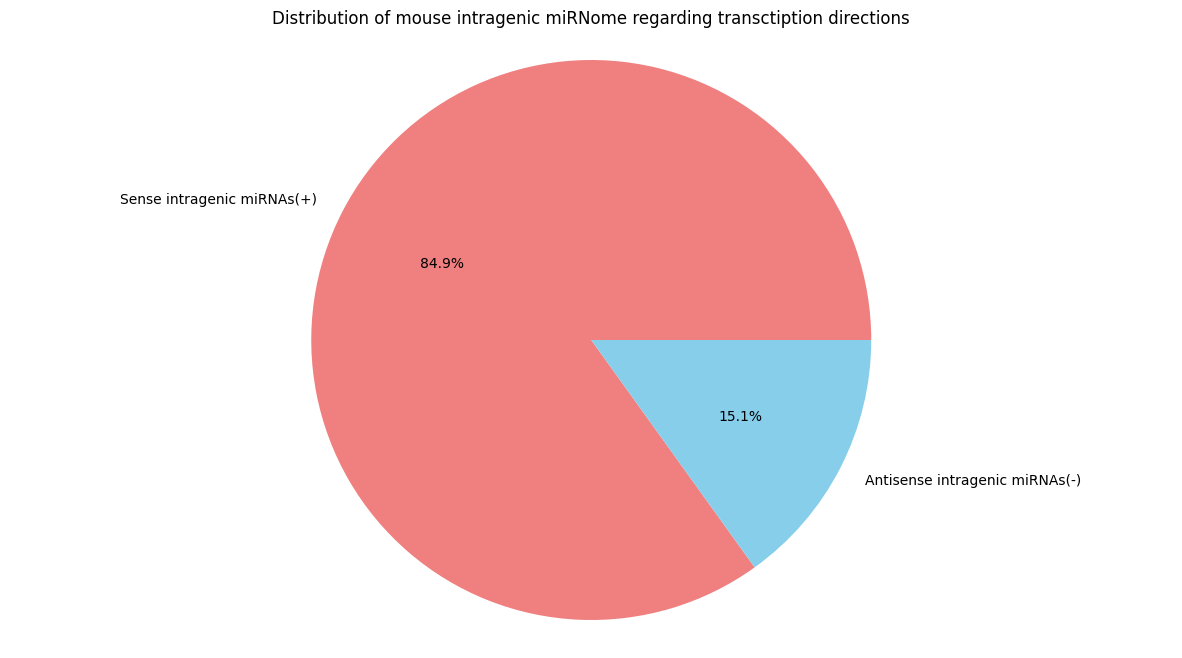

In [173]:
#Human miR loci distribution pie Chart
labels = ['Sense intragenic miRNAs(+)', 'Antisense intragenic miRNAs(-)']


sizes = [mm_intramiR_sense['Count'], mm_intramiR_antisense['Count']]
colors = ['lightcoral','skyblue']
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of mouse intragenic miRNome regarding transctiption directions')
plt.savefig(f'{current_dir}/Mouse_eps_file/Distribution of mouse intragenic miRNome.eps')
plt.show()

### Mouse

In [167]:
Mouse_miR_type_finalized_df.drop_duplicates(subset=['miR_Name'],inplace=True)####drop any duplicates to remove isoforms

In [168]:
Sub_mm_loci=Mouse_miR_type_finalized_df.groupby(Mouse_miR_type_finalized_df['miRNA_type']).size().reset_index(name='Count')

In [169]:
Sub_mm_loci

,miRNA_type,Count
0,exonic miR,170
1,intronic miR,598
2,no host mRNA miR,258
3,partially overlapped with exons and the opposi...,200


In [170]:
mm_exonic= mm_loci[Sub_mm_loci['miRNA_type']=='exonic miR'].sum()
mm_intronic= mm_loci[Sub_mm_loci['miRNA_type']=='intronic miR'].sum()
# mm_no_hostmRNA=mm_loci[Sub_mm_loci['miRNA_type']=='no host mRNA miR'].sum()
# mm_partexons=mm_loci[Sub_mm_loci['miRNA_type']=='partially overlapped with exons and the opposite strands'].sum()

/var/folders/hz/4x5ldhv54fscy_nw6y5dbf2m0000gn/T/ipykernel_12024/4246006168.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mm_exonic= mm_loci[Sub_mm_loci['miRNA_type']=='exonic miR'].sum()
/var/folders/hz/4x5ldhv54fscy_nw6y5dbf2m0000gn/T/ipykernel_12024/4246006168.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mm_intronic= mm_loci[Sub_mm_loci['miRNA_type']=='intronic miR'].sum()


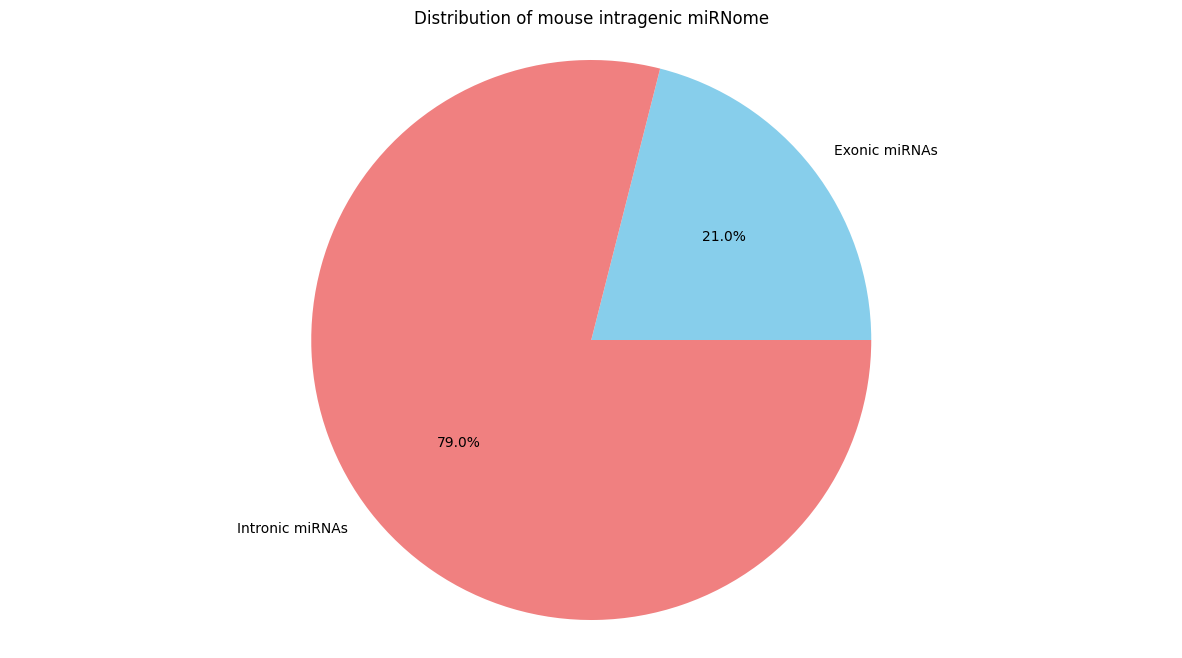

In [171]:
#Mouse miR loci distribution pie Chart
labels = ['Exonic miRNAs', 'Intronic miRNAs'] 
#'Intergenetic miRNAs','partially overlapped with exons and the opposite strands'are removed

sizes = [mm_exonic['Count'], mm_intronic['Count']]
#mm_no_hostmRNA['Count'],mm_partexons['Count']] are removed

colors = ['skyblue', 'lightcoral']
#'lightgreen', 'orange'are removed

plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of mouse intragenic miRNome')
plt.savefig(f'{current_dir}/Mouse_eps_file/Distribution of mouse intragenic miRNome.eps')
plt.show()

In [172]:
Mouse_miR_type_finalized_df

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,miRNA_type,main_miRNA_type
0,chr1,12425986,12426106,miRNA_primary_transcript,mmu-mir-6341,+,Alias=MI0021869,partially overlapped with exons and the opposi...,intragenic
2,chr1,20679010,20679082,miRNA_primary_transcript,mmu-mir-206,+,Alias=MI0000249,intronic miR,intragenic
5,chr1,20682769,20682887,miRNA_primary_transcript,mmu-mir-133b,+,Alias=MI0000821,exonic miR,intragenic
8,chr1,23272269,23272339,miRNA_primary_transcript,mmu-mir-30a,+,Alias=MI0000144,no host mRNA miR,intergenic
11,chr1,23291701,23291784,miRNA_primary_transcript,mmu-mir-30c-2,+,Alias=MI0000548,no host mRNA miR,intergenic
...,...,...,...,...,...,...,...,...,...
3325,chrX,150547385,150547445,miRNA_primary_transcript,mmu-mir-3620,-,Alias=MI0025027,partially overlapped with exons and the opposi...,intragenic
3328,chrX,151859562,151859637,miRNA_primary_transcript,mmu-mir-3113,+,Alias=MI0014111,exonic miR,intragenic
3331,chrX,151912346,151912428,miRNA_primary_transcript,mmu-let-7f-2,+,Alias=MI0000563,intronic miR,intragenic
3334,chrX,151913214,151913321,miRNA_primary_transcript,mmu-mir-98,+,Alias=MI0000586,intronic miR,intragenic


In [173]:
Mouse_miR_type_finalized_df.to_csv(f'{current_dir}/Mouse_csv_file/Mouse_miR_type_finalized_df_unique.csv',index=False)
Mouse_miR_type_finalized_df.to_excel(f'{current_dir}/Mouse_excel_file/Mouse_miR_type_finalized_df_unique.xlsx',index=False)

### Mouse

In [174]:
from EXONIC import Regions

importing Jupyter notebook from EXONIC.ipynb


In [175]:
all_exonic_mouse_exonic_miR=Regions(f'{current_dir}/Mouse_csv_file/mouse_exonic_miR(gene_type)_NCBI.csv')

In [176]:
all_exonic_mouse_exonic_miR.df.columns

Index(['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds',
       'hostgene_cdsStart', 'hostgene_cdsEnd', 'hostgene_strand',
       'hostgene_exonCounts', 'hostgene_txStarts', 'hostgene_txEnds',
       'mature_host_mRNA_Length', 'hostgene_Name', 'hostgene_NCBI_ID',
       'miR_name', 'miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type',
       'miR_strand', 'gene_type', 'pre_mRNA_length'],
      dtype='object')

In [177]:
all_exonic_mouse_exonic_miR.select(['hostgene_NCBI_ID','hostgene_Name','hostgene_strand','miR_name', 
                                   'miR_strand','gene_type'])

In [178]:
all_exonic_mouse_exonic_miR.df.to_csv(f'{current_dir}/Mouse_csv_file/mouse_exonic_miR_list(all_host_genes)_NCBI_no_loc.csv',index=False)
all_exonic_mouse_exonic_miR.df.to_excel(f'{current_dir}/Mouse_excel_file/mouse_exonic_miR_list(all_host_genes)_NCBI_no_loc.xlsx',index=False)
#### without the genomic coordinates

In [179]:
finalized_mouse_exonic_miR=Regions(f'{current_dir}/Mouse_csv_file/mouse_exonic_miR(gene_type)_NCBI.csv')

In [180]:
finalized_mouse_exonic_miR.select_coding()#### select protein-coding genes

In [181]:
finalized_mouse_exonic_miR.add_region()
#### add a new column called region, which will contain information of location of microRNAs such as 5'UTR,3'UTR,CDS

In [182]:
finalized_mouse_exonic_miR.select(['hostgene_NCBI_ID','hostgene_Name','hostgene_strand','hostgene_exonCounts','miR_name', 
                                   'miR_strand','region',"pre_mRNA_length",'mature_host_mRNA_Length','gene_type'])

In [183]:
finalized_mouse_exonic_miR.df.head(10)

,hostgene_NCBI_ID,hostgene_Name,hostgene_strand,hostgene_exonCounts,miR_name,miR_strand,region,pre_mRNA_length,mature_host_mRNA_Length,gene_type
10,XM_030248982.1,Strbp,-,19,mmu-mir-5128,-,5'UTR,119856.0,20102,protein-coding gene
11,NM_010434.2,Hipk3,-,16,mmu-mir-1902,-,3'UTR,68009.0,7497,protein-coding gene
12,NM_001145824.1,Hipk3,-,16,mmu-mir-1902,-,3'UTR,68009.0,7494,protein-coding gene
13,XM_006500575.3,Lama5,-,78,mmu-mir-7005,-,CDS,49526.0,11508,protein-coding gene
16,XM_011239023.3,Gad2,+,9,mmu-mir-3967,+,3'UTR,35260.0,5498,protein-coding gene
17,XM_006498476.4,Cercam,+,14,mmu-mir-219b,+,5'UTR,37740.0,3436,protein-coding gene
19,NM_001004174.2,AA467197,+,5,mmu-mir-147,+,3'UTR,3190.0,640,protein-coding gene
21,NM_001355516.1,Rps21,+,5,mmu-mir-3091,+,5'UTR,996.0,494,protein-coding gene
23,NM_001289701.1,Pde4dip,-,47,mmu-mir-7225,-,3'UTR,198880.0,8413,protein-coding gene
24,NM_001039376.2,Pde4dip,-,47,mmu-mir-7225,-,3'UTR,198880.0,8362,protein-coding gene


In [184]:
finalized_mouse_exonic_miR.df.shape

(221, 10)

In [185]:
finalized_mouse_exonic_miR.df.to_csv(f'{current_dir}/Mouse_csv_file/mouse_exonic_miR_list(protein_coding_host_genes)_NCBI.csv',index=False)
finalized_mouse_exonic_miR.df.to_excel(f'{current_dir}/Mouse_excel_file/mouse_exonic_miR_list(protein_coding_host_genes)_NCBI.xlsx',index=False)

In [186]:
finalized_mouse_exonic_miR_new=finalized_mouse_exonic_miR.df.drop_duplicates(subset=['miR_name'])

In [187]:
finalized_mouse_exonic_miR_new.to_csv(f'{current_dir}/Mouse_csv_file/mouse_exonic_miR_list(protein_coding_host_genes)_NCBI_unique.csv',index=False)
finalized_mouse_exonic_miR_new.to_excel(f'{current_dir}/Mouse_excel_file/mouse_exonic_miR_list(protein_coding_host_genes)_NCBI_unique.xlsx',index=False)

### Plot

### Mouse

In [188]:
def move_column(df, column, new_position):
    """This function will reassign the column to a new position."""
    col = df.pop(column)
    df.insert(new_position, column, col)
    return df

In [189]:
move_column(mouse_exonicmiR_df,'pre_mRNA_length',9)

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_exonCounts,hostgene_txStarts,hostgene_txEnds,pre_mRNA_length,mature_host_mRNA_Length,hostgene_Name,hostgene_NCBI_ID,miR_name,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_strand,gene_type
0,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,20510.0,5195,A330023F24Rik,NR_015566.2,mmu-mir-29b-2,chr1,195037040,195037120,miRNA_primary_transcript,+,non-coding gene
1,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,20510.0,5195,A330023F24Rik,NR_015566.2,mmu-mir-29c,chr1,195037547,195037634,miRNA_primary_transcript,+,non-coding gene
2,chr1,20682712,20682958,20682958,20682958,+,3,20669881,20682958,13077.0,521,Lincmd1,NR_131249.1,mmu-mir-133b,chr1,20682769,20682887,miRNA_primary_transcript,+,non-coding gene
3,chr1,86351980,86352127,86352127,86352127,-,1,86351980,86352127,147.0,147,Gm24148,NR_106184.1,mmu-mir-3535,chr1,86351981,86352127,miRNA_primary_transcript,-,non-coding gene
4,chr1,134946233,134946299,134946299,134946299,-,1,134946233,134946299,66.0,66,Gm51265,NR_162775.1,mmu-mir-5104b,chr1,134946234,134946299,miRNA_primary_transcript,-,non-coding gene
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,chr19,6829871,6830139,6829938,6839616,-,17,6829871,6842145,12274.0,3941,Rps6ka4,XM_017318261.2,mmu-mir-5046,chr19,6829886,6829944,miRNA_primary_transcript,-,protein-coding gene
335,chr19,6914078,6914292,6911750,6914091,-,6,6910976,6921709,10733.0,1903,Esrra,XM_017318209.2,mmu-mir-6990,chr19,6914196,6914286,miRNA_primary_transcript,-,protein-coding gene
336,chr19,6914078,6914292,6911750,6914091,-,7,6910976,6921814,10838.0,2345,Esrra,XM_030250950.1,mmu-mir-6990,chr19,6914196,6914286,miRNA_primary_transcript,-,protein-coding gene
337,chr19,7421913,7425908,7417778,7423106,+,4,7417757,7425908,8151.0,5040,2700081O15Rik,XM_011247115.3,mmu-mir-6991,chr19,7422573,7422642,miRNA_primary_transcript,+,protein-coding gene


In [190]:
### save it as a csv file for the unique list of miRNAs
mouse_exonicmiR_df_new=mouse_exonicmiR_df.drop_duplicates(subset=['miR_name'])
mouse_exonicmiR_df_new.to_csv(f'{current_dir}/Mouse_csv_file/mouse_exonic_miR(gene_type)_NCBI_unique.csv',index=False)
mouse_exonicmiR_df_new.to_excel(f'{current_dir}/Mouse_excel_file/mouse_exonic_miR(gene_type)_NCBI_unique.xlsx',index=False)

In [191]:
mouse_exonicmiR_df_new

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_exonCounts,hostgene_txStarts,hostgene_txEnds,pre_mRNA_length,mature_host_mRNA_Length,hostgene_Name,hostgene_NCBI_ID,miR_name,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_strand,gene_type
0,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,20510.0,5195,A330023F24Rik,NR_015566.2,mmu-mir-29b-2,chr1,195037040,195037120,miRNA_primary_transcript,+,non-coding gene
1,chr1,195033822,195037908,195037908,195037908,+,8,195017398,195037908,20510.0,5195,A330023F24Rik,NR_015566.2,mmu-mir-29c,chr1,195037547,195037634,miRNA_primary_transcript,+,non-coding gene
2,chr1,20682712,20682958,20682958,20682958,+,3,20669881,20682958,13077.0,521,Lincmd1,NR_131249.1,mmu-mir-133b,chr1,20682769,20682887,miRNA_primary_transcript,+,non-coding gene
3,chr1,86351980,86352127,86352127,86352127,-,1,86351980,86352127,147.0,147,Gm24148,NR_106184.1,mmu-mir-3535,chr1,86351981,86352127,miRNA_primary_transcript,-,non-coding gene
4,chr1,134946233,134946299,134946299,134946299,-,1,134946233,134946299,66.0,66,Gm51265,NR_162775.1,mmu-mir-5104b,chr1,134946234,134946299,miRNA_primary_transcript,-,non-coding gene
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,chr19,3850766,3850816,3850816,3850816,-,1,3850766,3850816,50.0,50,Gm51271,NR_162795.1,mmu-mir-12192,chr19,3850767,3850816,miRNA_primary_transcript,-,non-coding gene
333,chr19,6829871,6830139,6829938,6840547,-,18,6829083,6840627,11544.0,3132,Rps6ka4,NM_019924.2,mmu-mir-5046,chr19,6829886,6829944,miRNA_primary_transcript,-,protein-coding gene
335,chr19,6914078,6914292,6911750,6914091,-,6,6910976,6921709,10733.0,1903,Esrra,XM_017318209.2,mmu-mir-6990,chr19,6914196,6914286,miRNA_primary_transcript,-,protein-coding gene
337,chr19,7421913,7425908,7417778,7423106,+,4,7417757,7425908,8151.0,5040,2700081O15Rik,XM_011247115.3,mmu-mir-6991,chr19,7422573,7422642,miRNA_primary_transcript,+,protein-coding gene


In [192]:
mouse_exonicmiR_coding_df=Regions(f'{current_dir}/Mouse_csv_file/mouse_exonic_miR_list(protein_coding_host_genes)_NCBI_unique.csv')

In [193]:
mouse_exonicmiR_coding_df.df.shape

(83, 10)

In [194]:
mouse_exonicmiR_coding_df.df.head()

,hostgene_NCBI_ID,hostgene_Name,hostgene_strand,hostgene_exonCounts,miR_name,miR_strand,region,pre_mRNA_length,mature_host_mRNA_Length,gene_type
0,XM_030248982.1,Strbp,-,19,mmu-mir-5128,-,5'UTR,119856.0,20102,protein-coding gene
1,NM_010434.2,Hipk3,-,16,mmu-mir-1902,-,3'UTR,68009.0,7497,protein-coding gene
2,XM_006500575.3,Lama5,-,78,mmu-mir-7005,-,CDS,49526.0,11508,protein-coding gene
3,XM_011239023.3,Gad2,+,9,mmu-mir-3967,+,3'UTR,35260.0,5498,protein-coding gene
4,XM_006498476.4,Cercam,+,14,mmu-mir-219b,+,5'UTR,37740.0,3436,protein-coding gene


In [195]:
mouse_exonic_miR_region=mouse_exonicmiR_coding_df.df.groupby(mouse_exonicmiR_coding_df.df['region']).size().reset_index(name='Mouse')

In [196]:
mouse_exonic_miR_region

,region,Mouse
0,3'UTR,32
1,5'UTR,26
2,CDS,21
3,Span from CDS and 3'UTR,3
4,Span from CDS and 5'UTR,1


In [197]:
mm_exonic_3_UTR= mouse_exonic_miR_region[mouse_exonic_miR_region['region']=='3\'UTR'].sum()
mm_exonic_5_UTR= mouse_exonic_miR_region[mouse_exonic_miR_region['region']=='5\'UTR'].sum()
mm_exonic_CDS=mouse_exonic_miR_region[mouse_exonic_miR_region['region']=='CDS'].sum()
mm_exonic_3_CDS_UTR=mouse_exonic_miR_region[mouse_exonic_miR_region['region']=='Span from CDS and 3\'UTR'].sum()
mm_exonic_5_CDS_UTR=mouse_exonic_miR_region[mouse_exonic_miR_region['region']=='Span from CDS and 5\'UTR'].sum()

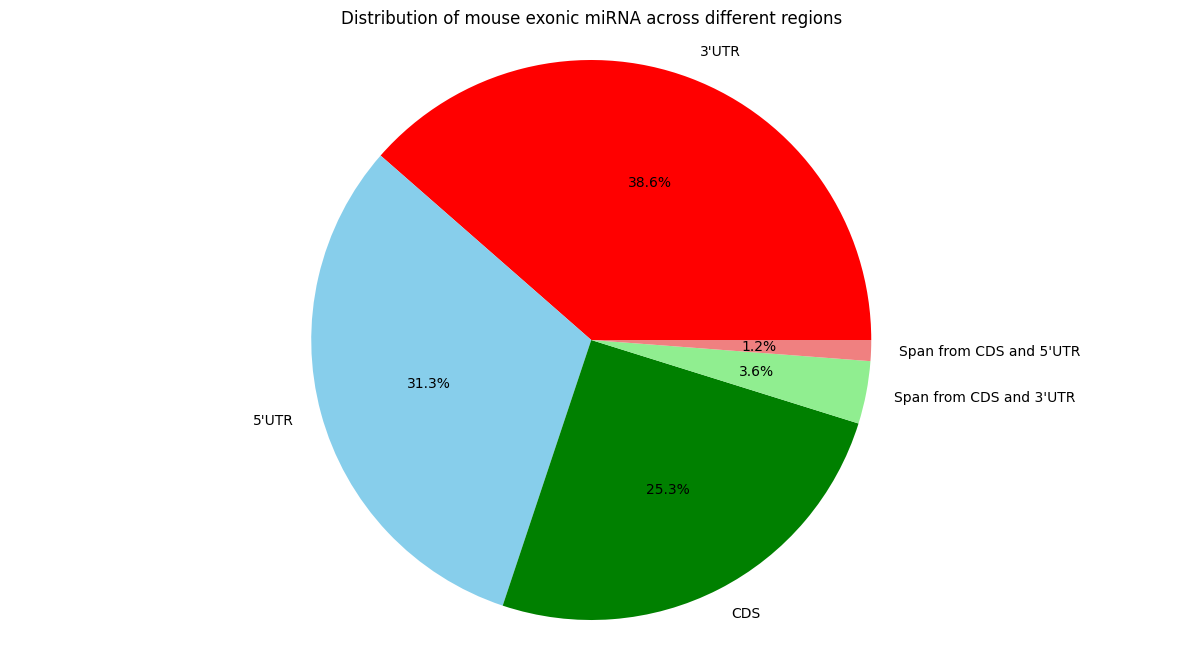

In [198]:
labels = ['3\'UTR', '5\'UTR', 'CDS','Span from CDS and 3\'UTR','Span from CDS and 5\'UTR']
sizes = [mm_exonic_3_UTR['Mouse'], mm_exonic_5_UTR['Mouse'],mm_exonic_CDS['Mouse'],mm_exonic_3_CDS_UTR['Mouse'],mm_exonic_5_CDS_UTR['Mouse']]
colors = ['red', 'skyblue', 'green','lightgreen', 'lightcoral']
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of mouse exonic miRNA across different regions')
plt.savefig(f'{current_dir}/Mouse_eps_file/Distribution of mouse exonic miRNA across different regions of the gene.eps')
plt.show()

### Coding intragenic genes(Intronic vs Exonic sense miRs)

### Exonic 

In [199]:
mouse_exonicmiR_df.shape

(339, 20)

In [200]:
mouse_exonicmiR_df_new["host_gene_region"]="exons"

/var/folders/hz/4x5ldhv54fscy_nw6y5dbf2m0000gn/T/ipykernel_12024/2584326956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mouse_exonicmiR_df_new["host_gene_region"]="exons"


In [201]:
mouse_intramiR_exonic_gene_type=mouse_exonicmiR_df_new[[ 'hostgene_NCBI_ID', 'hostgene_Name',
       'miR_name', 'miR_type', 'miR_strand', 'gene_type','host_gene_region']]

### Intronic 

In [203]:
mouse_intronicmiR_df_gene_type=mouse_intronicmiR_df.drop_duplicates(subset=['miR_name'])

In [204]:
mouse_intronicmiR_df_gene_type.to_csv(f'{csv_file_path}/mouse_intronic_miR(gene_type)_NCBI_unique.csv',index=False)
mouse_intronicmiR_df_gene_type.to_excel(f'{excel_file_path}/mouse_intronic_miR(gene_type)_NCBI_unique.xlsx',index=False)

In [205]:
mouse_intronicmiR_df_gene_type.columns

Index(['hostgene_chrom', 'hostgene_TxStarts', 'hostgene_TxEnds',
       'hostgene_cdsStart', 'hostgene_cdsEnd', 'hostgene_strand',
       'hostgene_Name', 'hostgene_NCBI_ID', 'miR_chrom', 'miR_exonStarts',
       'miR_exonEnds', 'miR_type', 'miR_name', 'miR_strand', 'gene_type',
       'pre_mRNA_length'],
      dtype='object')

In [206]:
mouse_intronicmiR_df_gene_type.shape

(599, 16)

In [207]:
mouse_intronicmiR_df_gene_type["host_gene_region"]="introns"

/var/folders/hz/4x5ldhv54fscy_nw6y5dbf2m0000gn/T/ipykernel_12024/2816811919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mouse_intronicmiR_df_gene_type["host_gene_region"]="introns"


In [208]:
mouse_intronicmiR_df_gene_type.shape

(599, 17)

In [209]:
mouse_intramiR_intronic_gene_type=mouse_intronicmiR_df_gene_type[[ 'hostgene_NCBI_ID', 'hostgene_Name',
       'miR_name', 'miR_type', 'miR_strand', 'gene_type','host_gene_region']]

In [210]:
mouse_intramiR_intronic_gene_type.shape

(599, 7)

In [218]:
mouse_intramiR_gene_type=pd.concat([mouse_intramiR_exonic_gene_type,mouse_intramiR_intronic_gene_type],axis=0)

In [219]:
mouse_intramiR_gene_type

,hostgene_NCBI_ID,hostgene_Name,miR_name,miR_type,miR_strand,gene_type,host_gene_region
0,NR_015566.2,A330023F24Rik,mmu-mir-29b-2,miRNA_primary_transcript,+,non-coding gene,exons
1,NR_015566.2,A330023F24Rik,mmu-mir-29c,miRNA_primary_transcript,+,non-coding gene,exons
2,NR_131249.1,Lincmd1,mmu-mir-133b,miRNA_primary_transcript,+,non-coding gene,exons
3,NR_106184.1,Gm24148,mmu-mir-3535,miRNA_primary_transcript,-,non-coding gene,exons
4,NR_162775.1,Gm51265,mmu-mir-5104b,miRNA_primary_transcript,-,non-coding gene,exons
...,...,...,...,...,...,...,...
3987,XM_030250891.1,Cbwd1,mmu-mir-3084-1,miRNA_primary_transcript,-,protein-coding gene,introns
3991,NM_021525.2,Rcl1,mmu-mir-101b,miRNA_primary_transcript,+,protein-coding gene,introns
3994,XM_011247247.3,Kif20b,mmu-mir-1950,miRNA_primary_transcript,+,protein-coding gene,introns
4004,XR_386763.4,Gm36493,mmu-mir-146b,miRNA_primary_transcript,+,non-coding gene,introns


In [220]:
mm_intramiR_coding=mouse_intramiR_gene_type.loc[mouse_intramiR_gene_type['gene_type']=="protein-coding gene"]

In [221]:
mm_intramiR_coding=mm_intramiR_coding.groupby(mm_intramiR_coding['host_gene_region']).size().reset_index(name='Count')

In [222]:
mm_intramiR_coding

,host_gene_region,Count
0,exons,80
1,introns,510


In [223]:
mm_exonic_intramiR_coding= mm_intramiR_coding[mm_intramiR_coding['host_gene_region']=='exons'].sum()
mm_intronic_intramiR_coding= mm_intramiR_coding[mm_intramiR_coding['host_gene_region']=='introns'].sum()

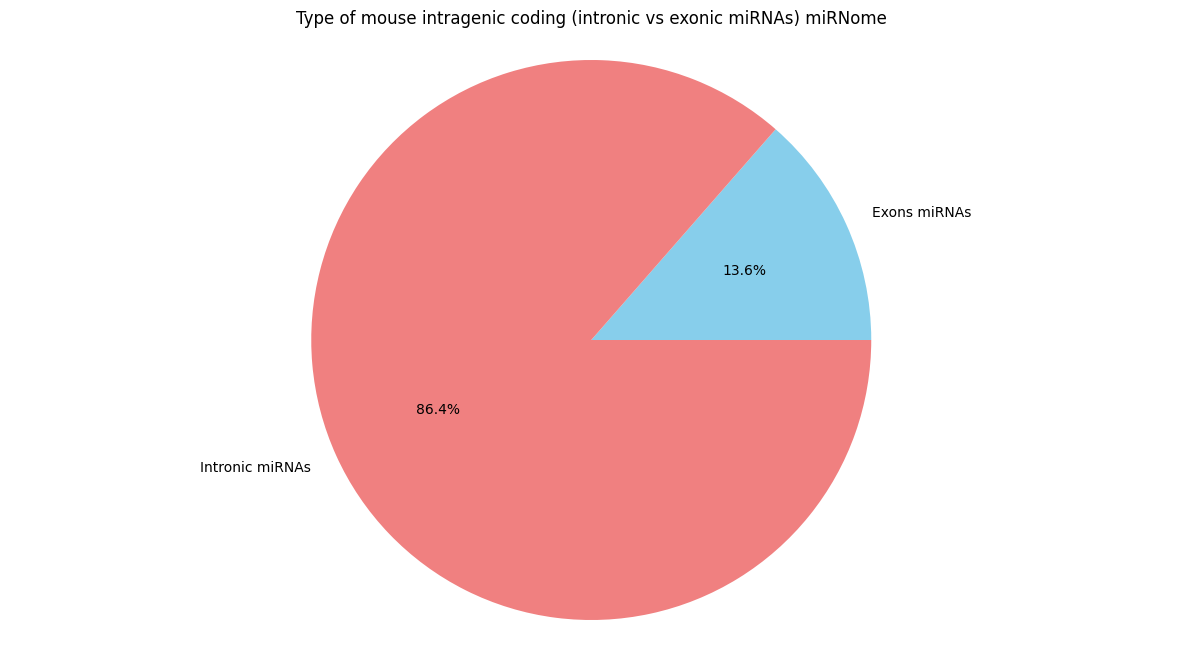

In [224]:
#Mouse miR loci distribution pie Chart
labels = ['Exons miRNAs', 'Intronic miRNAs']
sizes = [mm_exonic_intramiR_coding['Count'], mm_intronic_intramiR_coding['Count']]
colors = ['skyblue','lightcoral', ]
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Type of mouse intragenic coding (intronic vs exonic miRNAs) miRNome')
plt.savefig(f'{current_dir}/Mouse_eps_file/Type of mouse intragenic coding (intronic vs exonic miRNAs) miRNome.eps')
plt.show()

### Noncoding

In [225]:
mm_intramiR_noncoding=mouse_intramiR_gene_type.loc[mouse_intramiR_gene_type['gene_type']=="non-coding gene"]

In [226]:
mm_intramiR_noncoding=mm_intramiR_noncoding.groupby(mm_intramiR_noncoding['host_gene_region']).size().reset_index(name='Count')

In [227]:
mm_intramiR_noncoding

,host_gene_region,Count
0,exons,90
1,introns,89


In [228]:
mm_exonic_intramiR_noncoding= mm_intramiR_noncoding[mm_intramiR_noncoding['host_gene_region']=='exons'].sum()
mm_intronic_intramiR_noncoding= mm_intramiR_noncoding[mm_intramiR_noncoding['host_gene_region']=='introns'].sum()

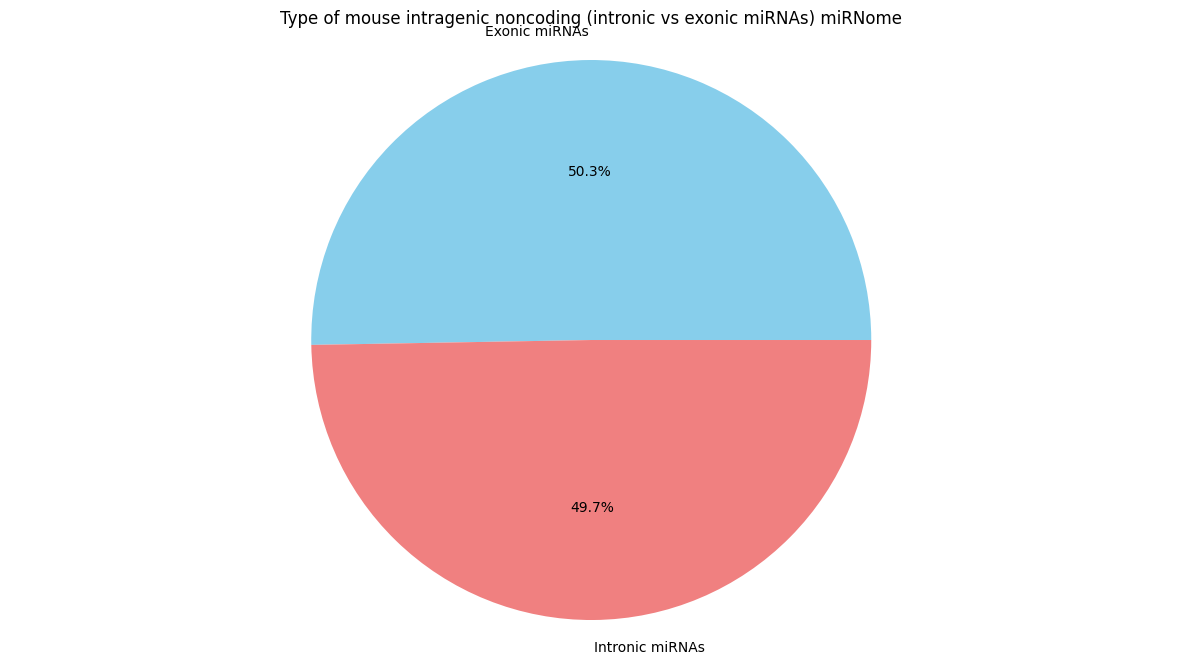

In [230]:
#Mouse miR loci distribution pie Chart
labels = ['Exonic miRNAs', 'Intronic miRNAs']
sizes = [mm_exonic_intramiR_noncoding['Count'], mm_intronic_intramiR_noncoding['Count']]
colors = ['skyblue','lightcoral', ]
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Type of mouse intragenic noncoding (intronic vs exonic miRNAs) miRNome')
plt.savefig(f'{current_dir}/mOuse_eps_file/Type of mouse intragenic noncoding (intronic vs exonic miRNAs) miRNome.eps')
plt.show()

### Noncoding vs Coding genes(Exonic_PLOT)

### Mouse

In [148]:
mouse_exonicmiR_df.drop_duplicates(subset=['miR_name'],inplace=True)

In [149]:
mouse_exonicmiR_df.shape

(170, 20)

In [150]:
mm_miR_gene_type=mouse_exonicmiR_df.groupby(mouse_exonicmiR_df['gene_type']).size().reset_index(name='Count')

In [151]:
mm_miR_gene_type

,gene_type,Count
0,non-coding gene,90
1,protein-coding gene,80


In [152]:
mm_exonic_proteincoding=mm_miR_gene_type[mm_miR_gene_type['gene_type']=='protein-coding gene'].sum()
mm_exonic_noncoding=mm_miR_gene_type[mm_miR_gene_type['gene_type']=='non-coding gene'].sum()

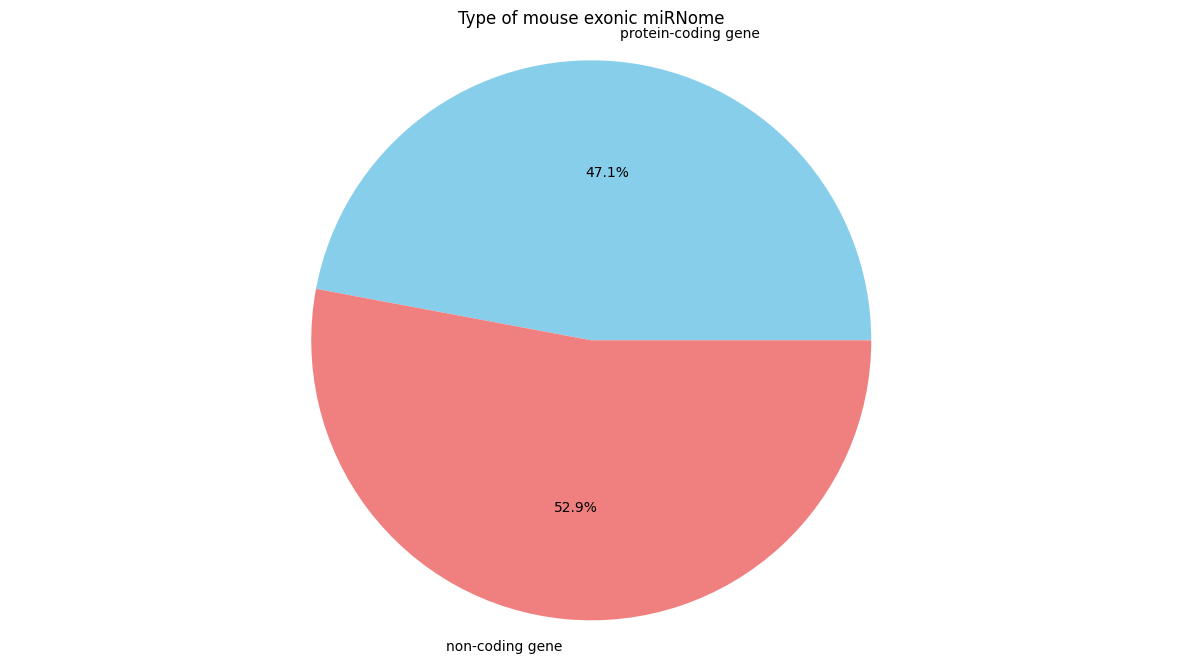

In [153]:
#Mouse miR loci distribution pie Chart
labels = ['protein-coding gene', 'non-coding gene']
sizes = [mm_exonic_proteincoding['Count'], mm_exonic_noncoding['Count']]
colors = ['skyblue','lightcoral', ]
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Type of mouse exonic miRNome')
plt.savefig(f'{current_dir}/Mouse_eps_file/Type of mouse exonic miRNome.eps')
plt.show()

### Noncoding vs Coding genes(Intronic_PLOT)

### Mouse

In [155]:
mouse_intronicmiR_df_gene_type=mouse_intronicmiR_df.drop_duplicates(subset=['miR_name'])

In [158]:
mouse_intronicmiR_df_gene_type.to_csv(f'{csv_file_path}/mouse_intronic_miR(gene_type)_NCBI_unique.csv',index=False)
mouse_intronicmiR_df_gene_type.to_excel(f'{current_dir}/Mouse_excel_file/mouse_intronic_miR(gene_type)_NCBI_unique.xlsx',index=False)

In [159]:
mm_miR_intronic_gene_type=mouse_intronicmiR_df.groupby(mouse_intronicmiR_df_gene_type['gene_type']).size().reset_index(name='Count')

In [160]:
mm_miR_intronic_gene_type

,gene_type,Count
0,non-coding gene,89
1,protein-coding gene,510


In [161]:
mm_intronic_proteincoding=mm_miR_intronic_gene_type[mm_miR_intronic_gene_type['gene_type']=='protein-coding gene'].sum()
mm_intronic_noncoding=mm_miR_intronic_gene_type[mm_miR_intronic_gene_type['gene_type']=='non-coding gene'].sum()

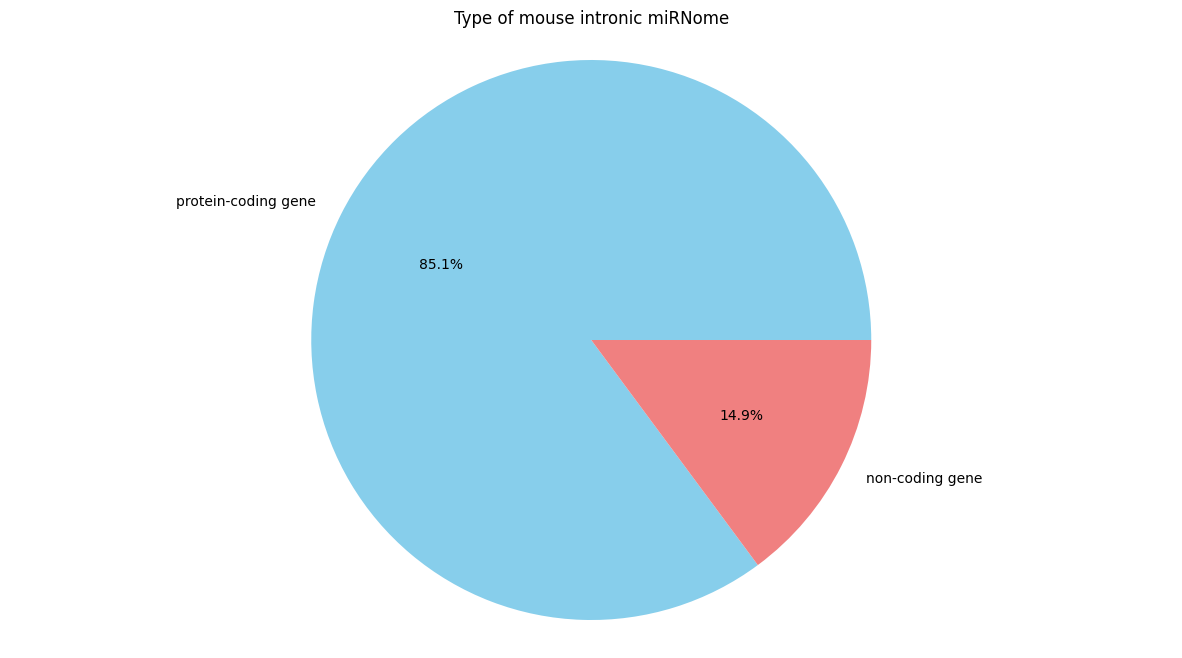

In [162]:
###Intronic
#Mouse miR loci distribution pie Chart
labels = ['protein-coding gene', 'non-coding gene']
sizes = [mm_intronic_proteincoding['Count'], mm_intronic_noncoding['Count']]
colors = ['skyblue','lightcoral', ]
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Type of mouse intronic miRNome')
plt.savefig(f'{current_dir}/Mouse_eps_file/Type of mouse intronic miRNome.eps')
plt.show()